# **A TEXT MINING STUDY OF ARGONAUT HOTEL GUEST REVIEWS:** **UNDERSTANDING GUEST EXPERIENCES ACROSS MULTIPLE ONLINE PLATFORMS**

**Abstract:**

This study analyzes 1,120 guest reviews of the Argonaut Hotel from TripAdvisor, Yelp, Google Reviews, Reddit, and Facebook using text mining techniques to uncover key themes and sentiments. By applying exploratory data analysis, topic modeling (LDA, NMF, BERTopic), sentiment analysis (TextBlob, VADER, BERT), and clustering, the research identifies dominant topics such as the hotel’s excellent location, friendly staff, room comfort, and pricing concerns. LDA was selected as the most practical model for its clear and interpretable themes. From sentiment analyse, with 3 model, all positive sentiment was dominance and TextBlob performance was better than other two models. The findings also reveal that location is the most consistently praised aspect across all platforms, while service and amenities also play key roles in guest satisfaction. Cross-platform analysis provides a more holistic view of guest experiences, though platform-specific language and biases remain a challenge. The study offers actionable insights for hotel management and contributes to the growing field of hospitality analytics, emphasizing the importance of integrating online guest feedback into service improvement strategies.

# **I. Loading and cleaning the dataset**

The dataset orginally have more than 1500 review, but then it was manually have some basice clean by the team member to 1143 review. The cleaned dataset for this study contained 1120 records from multiple online review platforms, including TripAdvisor, Yelp, Google review, Reddit and Facebook. The data was collected from 2024 to 2025 from Argonaut Hotel reviews across multiple platforms.

Google has 306 reviews

Tripadvisor has 498 reviews

Reddit has 41 reviews

Facebook has 32 reviews

Yelp has 243 reviews

In [ ]:
# Install libraries to
!pip install gensim pyLDAvis
!pip install scikit-learn
!pip install bertopic
!pip install sentence-transformers
!pip install kneed

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 34.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu

In [ ]:
# Import library
import string
import re
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from bs4 import BeautifulSoup
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
from sentence_transformers import SentenceTransformer
import pyLDAvis
import pyLDAvis.lda_model
from IPython.display import display
import seaborn as sns
import spacy
from tqdm import tqdm
from bertopic import BERTopic
from textblob import TextBlob
from transformers import pipeline
from kneed import KneeLocator


/usr/local/lib/python3.11/dist-packages/spacy/cli/_util.py:23: DeprecationWarning: Importing 'parser.split_arg_string' is deprecated, it will only be available in 'shell_completion' in Click 9.0.
  from click.parser import split_arg_string
/usr/local/lib/python3.11/dist-packages/weasel/util/config.py:8: DeprecationWarning: Importing 'parser.split_arg_string' is deprecated, it will only be available in 'shell_completion' in Click 9.0.
  from click.parser import split_arg_string
/usr/local/lib/python3.11/dist-packages/hdbscan/plots.py:448: DeprecationWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.11/dist-packages/hdbscan/robust_single_linkage_.py:154: DeprecationWarning: invalid escape sequence '\{'
  """Perform robust single linkage clustering from a vector array


In [ ]:
# Download NLTK resources (skip punkt)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Load CSV
df = pd.read_csv("/content/merge_data.csv")
df.head()

,id,reviews,platform
0,1,Great location. Great service. Rooms are nice....,Google Map
1,2,"Wish they had a microwave and better Wi-Fi, bu...",Google Map
2,3,Awesome location. Room nice and big. Nice brea...,Google Map
3,4,We absolutely loved our stay at the the Argona...,Google Map
4,5,Overall clean hotel and friendly staff. Great ...,Google Map


Top 5 cleaned reviews:


,reviews,platform,cleaned_advanced
0,great location. great service. rooms are nice....,google map,great location great service nice everyone wor...
1,"wish they had a microwave and better wi-fi, bu...",google map,wish microwave better wifi otherwise pretty gr...
2,awesome location. room nice and big. nice brea...,google map,awesome location nice big nice breakfast optio...
3,we absolutely loved our stay at the the argona...,google map,absolutely loved argonaut fisherman wharf san ...
4,overall clean hotel and friendly staff. great ...,google map,overall clean friendly staff great location wa...


✅ Exported to 'cleaned_merge_data_advanced.csv'
Top 10 frequent words:
[('location', 659), ('great', 646), ('staff', 531), ('wharf', 374), ('argonaut', 348), ('restaurant', 345), ('nice', 318), ('view', 316), ('would', 313), ('u', 299)]


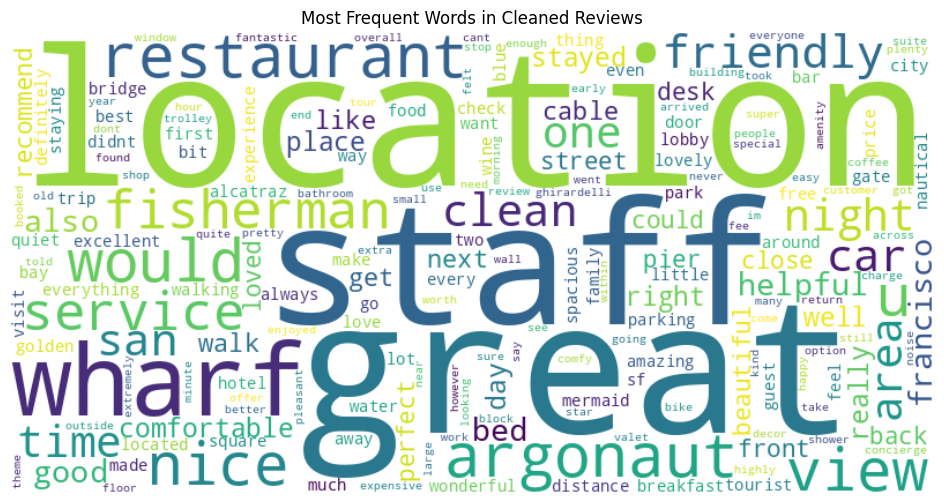

In [ ]:
# Step 1: Convert 'reviews' and 'platform' to string and lowercase
df['reviews'] = df['reviews'].astype(str).str.lower()
df['platform'] = df['platform'].astype(str).str.lower()

# Step 2: Remove nulls and duplicates in 'reviews'
df = df.dropna(subset=['reviews']).drop_duplicates(subset=['reviews'])

# Step 3: Setup tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
custom_stopwords = {'hotel', 'room', 'rooms', 'stay'}
stop_words |= custom_stopwords
tokenizer = RegexpTokenizer(r'\b[a-z]{2,}\b')

def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def clean_advanced(text):
    text = text.encode('ascii', errors='ignore').decode()             # Remove non-ascii
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)                # Remove URLs
    text = remove_html(text)                                           # Remove HTML
    text = re.sub(r'\d+', '', text)                                    # Remove Numbers
    text = text.translate(str.maketrans('', '', string.punctuation))   # Remove Punctuation
    tokens = tokenizer.tokenize(text)                                  # Tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Step 4: Clean the reviews
df['cleaned_advanced'] = df['reviews'].apply(clean_advanced)
df['cleaned_advanced'] = df['cleaned_advanced'].str.lower()  # enforce lowercase

# Step 5: Filter out short reviews (<3 words)
df = df[df['cleaned_advanced'].str.split().str.len() >= 3]

# Step 6: Preview cleaned data
print("Top 5 cleaned reviews:")
display(df[['reviews', 'platform', 'cleaned_advanced']].head())

# Step 7: Export to CSV
df.to_csv("cleaned_merge_data_advanced.csv", index=False)
print("✅ Exported to 'cleaned_merge_data_advanced.csv'")

# Step 8: Word frequency and WordCloud
all_words = df['cleaned_advanced'].str.split().explode()
word_freq = Counter(all_words)
print("Top 10 frequent words:")
print(word_freq.most_common(10))

# WordCloud visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Cleaned Reviews")
plt.show()

# **II. EDA**

In [ ]:
# =============================================================================
# Exploratory Data Analysis (EDA) tasks:
# • Sentence, word, and character count per text record
# • Text length distributions histogram
# • Average number of words per sentence
# • Top N frequent words
# • Bi-grams, and tri-grams
# • Word cloud
# • Stopword ratio (did not include due to not provide insight for our project objective)
# =============================================================================


# Load spaCy and stopwords
nlp = spacy.load("en_core_web_sm")
spacy_stopwords = nlp.Defaults.stop_words
combined_stopwords = STOPWORDS.union(spacy_stopwords)

# only keep “content” POS types
CONTENT_POS = {"NOUN","VERB","ADJ","ADV","PROPN"}

#Load your data
df_EDA = (
    pd.read_csv("/content/cleaned_merge_data_no_cleaned_advanced.csv")
      .dropna(subset=["reviews"])
)

## 1.Text length distributions

In [ ]:
# The following code below was support by ChatGPT and modify
# Initialize accumulators
char_counts = []
word_counts = []
sentence_counts = []
avg_word_lengths = []
avg_words_per_sentence = []
stopword_ratios = []
pos_counts = Counter()
ner_counts = Counter()
all_tokens = []

# Process each review
for doc in tqdm(nlp.pipe(df_EDA["reviews"].tolist()), total=len(df_EDA)):
    text = doc.text
    char_counts.append(len(text))

    # POS‐filtered word list (drops ADP, DET, PART, etc., and junk like “nt”)
    words = [
        tok for tok in doc
        if tok.is_alpha
           and tok.pos_ in CONTENT_POS
    ]
    word_counts.append(len(words))

    sents = list(doc.sents)
    sentence_counts.append(len(sents))

    avg_word_lengths.append(
        sum(len(tok.text) for tok in words) / len(words) if words else 0
    )
    avg_words_per_sentence.append(
        len(words) / len(sents) if sents else 0
    )

    sw_count = sum(1 for tok in words if tok.text.lower() in spacy_stopwords)
    stopword_ratios.append(sw_count / len(words) if words else 0)

    # POS counts & token accumulation for n-grams
    for tok in words:
        pos_counts[tok.pos_] += 1
        w = tok.text.lower()
        if w not in combined_stopwords:
            all_tokens.append(w)

    # NER counts
    for ent in doc.ents:
        ner_counts[ent.label_] += 1

# Add metrics back to dataframe
df_EDA["char_count"]              = char_counts
df_EDA["word_count"]              = word_counts
df_EDA["sentence_count"]          = sentence_counts
df_EDA["avg_word_length"]         = avg_word_lengths
df_EDA["avg_words_per_sentence"]  = avg_words_per_sentence
df_EDA["stopword_ratio"]          = stopword_ratios


# Summary statistics
print("=== Summary Statistics ===")
print(
    df_EDA[
        [
            "char_count",
            "word_count",
            "sentence_count",
            "avg_word_length",
            "avg_words_per_sentence",
            "stopword_ratio",
        ]
    ].describe()
)


totals = df_EDA[["char_count", "word_count", "sentence_count"]].sum().to_frame(name="total")
# Print summary and totals
print("\n=== Total Counts ===")
print(totals)


# Compute top words, bi-grams, tri-grams
common_words = Counter(all_tokens).most_common(20)
bigrams      = zip(all_tokens, all_tokens[1:])
trigrams     = zip(all_tokens, all_tokens[1:], all_tokens[2:])
top_bigrams  = Counter(bigrams).most_common(10)
top_trigrams = Counter(trigrams).most_common(10)

100%|██████████| 1120/1120 [00:19<00:00, 57.27it/s]

=== Summary Statistics ===
        char_count   word_count  sentence_count  avg_word_length  \
count  1120.000000  1120.000000     1120.000000      1120.000000   
mean    460.539286    44.649107        3.609821         5.811666   
std     453.534865    42.275291        4.166603         0.557767   
min      16.000000     2.000000        1.000000         3.666667   
25%     204.000000    20.000000        1.000000         5.467473   
50%     322.500000    32.000000        2.000000         5.778312   
75%     569.500000    56.000000        5.000000         6.125000   
max    5536.000000   485.000000       33.000000         9.250000   

       avg_words_per_sentence  stopword_ratio  
count             1120.000000     1120.000000  
mean                22.069431        0.142075  
std                 24.844012        0.079049  
min                  1.875000        0.000000  
25%                  6.000000        0.091605  
50%                 10.050000        0.142857  
75%                 30.0

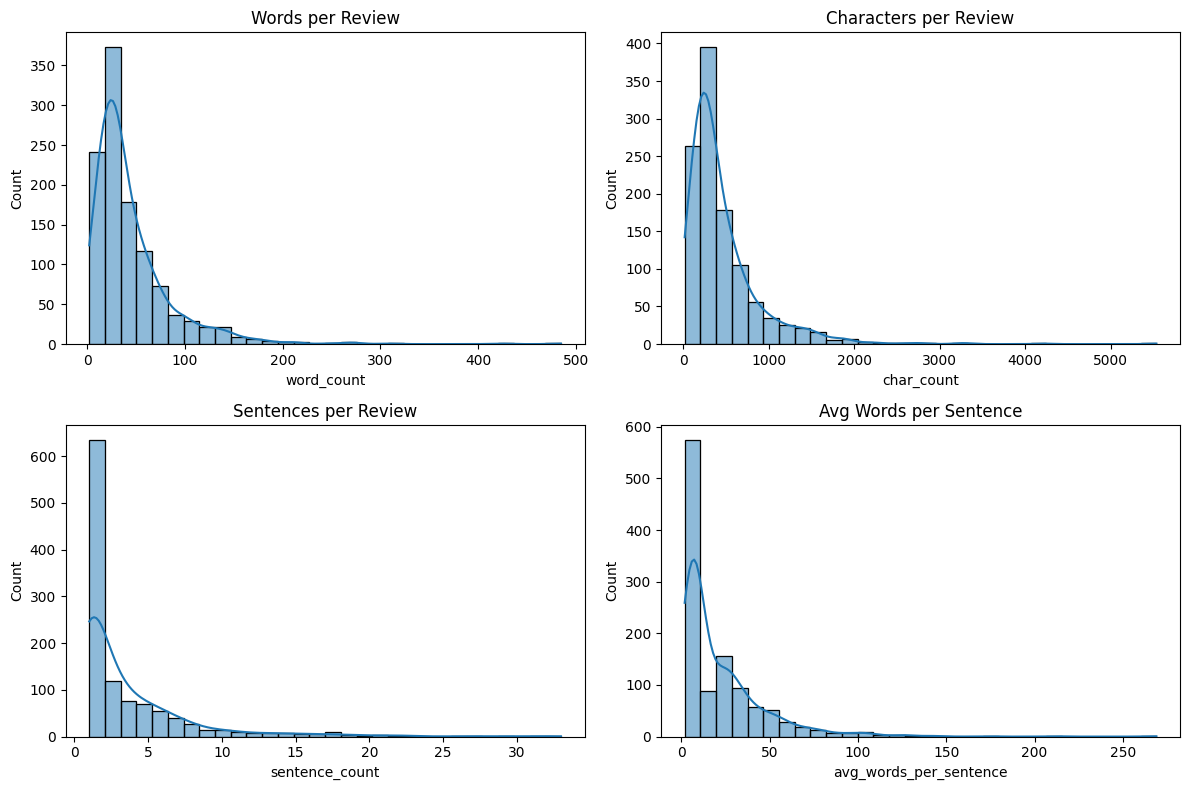

In [ ]:
# Text length distributions histogram
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df_EDA["word_count"], bins=30, kde=True, ax=axes[0,0]).set_title("Words per Review")
sns.histplot(df_EDA["char_count"], bins=30, kde=True, ax=axes[0,1]).set_title("Characters per Review")
sns.histplot(df_EDA["sentence_count"], bins=30, kde=True, ax=axes[1,0]).set_title("Sentences per Review")
sns.histplot(df_EDA["avg_words_per_sentence"], bins=30, kde=True, ax=axes[1,1]).set_title("Avg Words per Sentence")
plt.tight_layout()
plt.show()

**Analysis**:

From the above statistic and graphs, we can have some insights:

- Most reviews are relatively short, averaging about 45 words, 461 characters, and 3.6 sentences.

- Distributions are right-skewed, indicating a few very long reviews.

- On average, sentences contain approximately 22 words, with some go beyond 250.

- The average word length is 5.8 characters, indicating generally concise vocabulary.


## **2. Lexical Frequency Analysis**

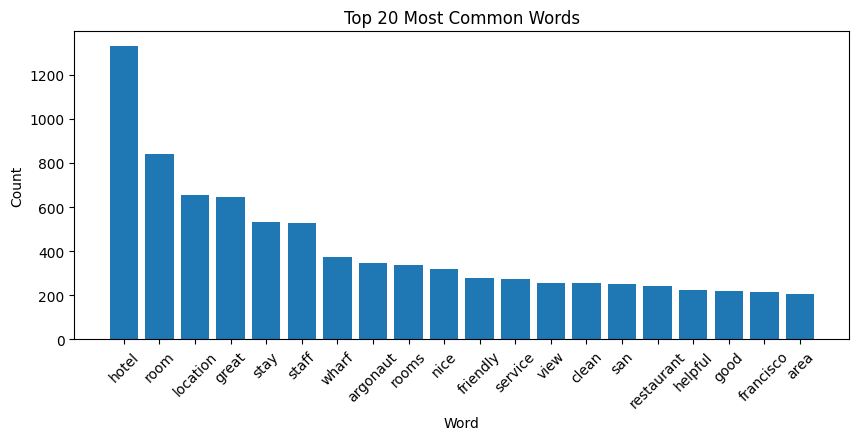

In [ ]:
# Stopword ratio distribution (did not include due to not provide insight for our project objective)
# plt.figure(figsize=(8,4))
# plt.hist(df["stopword_ratio"], bins=30, alpha=0.8)
# plt.title("Stopword Ratio per Review")
# plt.xlabel("Fraction of Words that are Stopwords")
# plt.ylabel("Number of Reviews")
# plt.show()

# Top N frequent words
words, counts = zip(*common_words)
plt.figure(figsize=(10,4))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words")
plt.xlabel("Word")
plt.ylabel("Count")
plt.show()

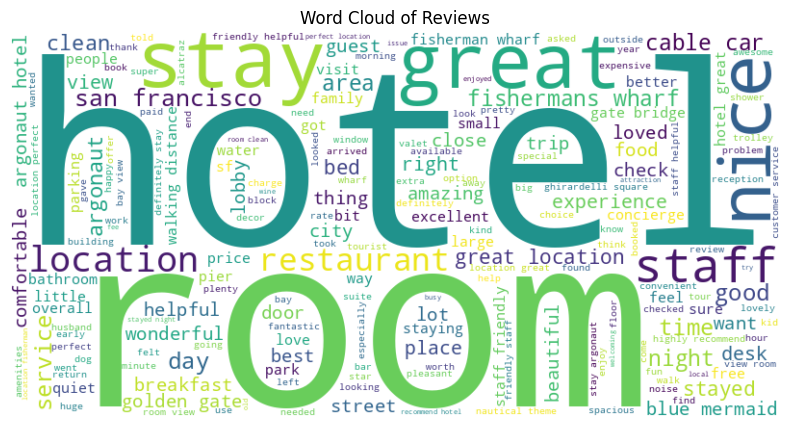

In [ ]:
# Word cloud
wc = WordCloud(
    width=800,
    height=400,
    background_color="white",
    stopwords=combined_stopwords
).generate(" ".join(all_tokens))
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Reviews")
plt.show()

**Analysis**:

From top common words and word cloud, there are some insight

- Dominant words like "hotel," "room," "location," "stay," and "staff" reflect the primary context of hotel reviews.

- The word cloud confirms positive sentiment with frequent terms like "great," "nice," "friendly," "clean," and "helpful."


## **3. N-gram**

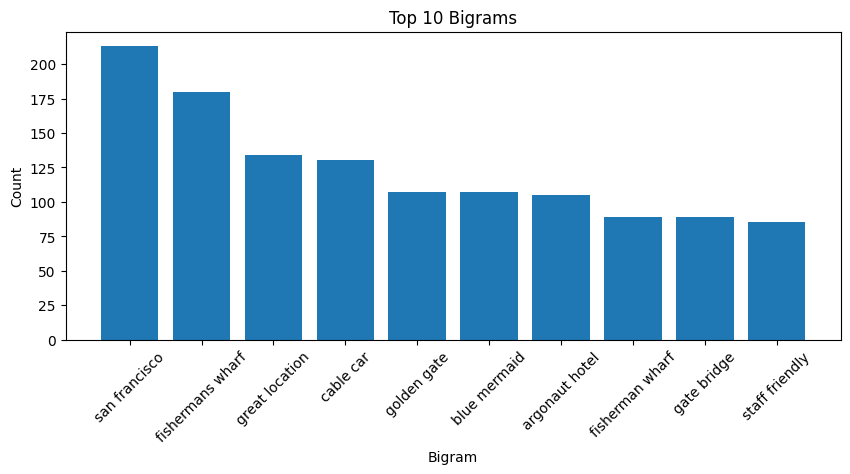

In [ ]:
# Bi-grams
labels, counts = zip(*[(" ".join(bg), c) for bg, c in top_bigrams])
plt.figure(figsize=(10,4))
plt.bar(labels, counts)
plt.xticks(rotation=45)
plt.title("Top 10 Bigrams")
plt.xlabel("Bigram")
plt.ylabel("Count")
plt.show()

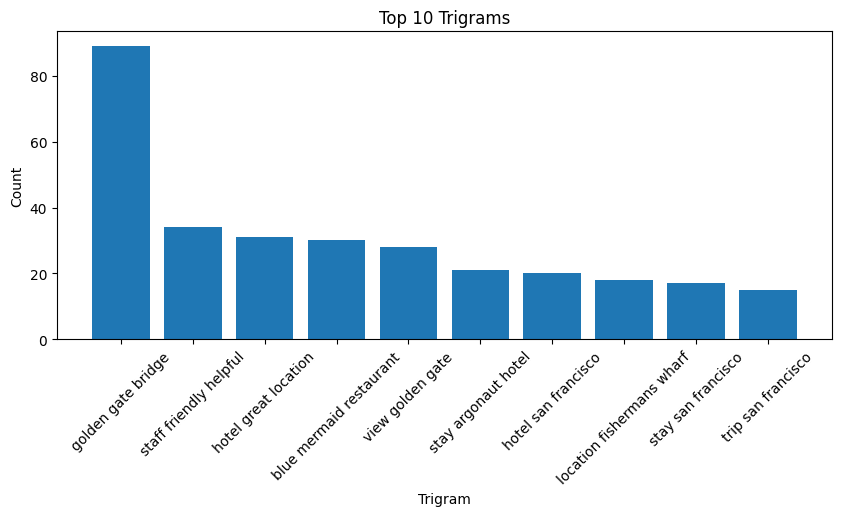

In [ ]:
# Tri-grams
labels, counts = zip(*[(" ".join(tg), c) for tg, c in top_trigrams])
plt.figure(figsize=(10,4))
plt.bar(labels, counts)
plt.xticks(rotation=45)
plt.title("Top 10 Trigrams")
plt.xlabel("Trigram")
plt.ylabel("Count")
plt.show()

**Analysis**:

From two graph above, we habe

- Common bigrams include "san francisco," "great location," and "fishermans wharf," highlighting the geographic context and travel relevance.

- Trigrams such as "golden gate bridge" and "staff friendly helpful" indicate frequently discussed landmarks and positive service-related mentions.

## **4. Part-of-Speech**

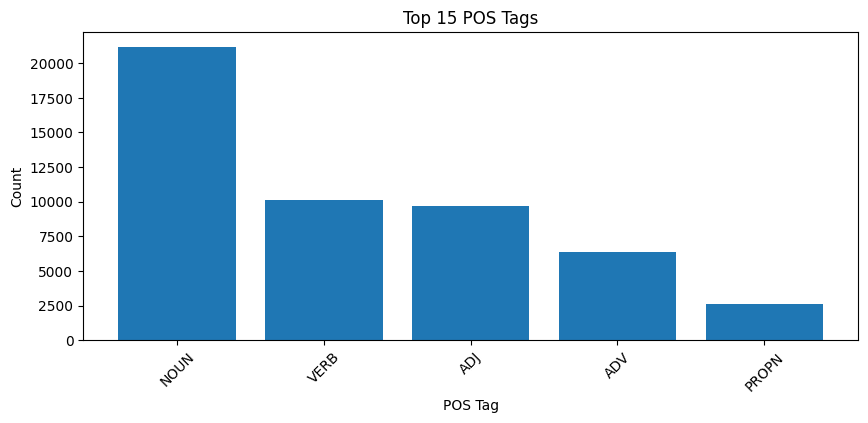

In [ ]:
# POS tag distribution
labels, counts = zip(*pos_counts.most_common(15))
plt.figure(figsize=(10,4))
plt.bar(labels, counts)
plt.xticks(rotation=45)
plt.title("Top 15 POS Tags")
plt.xlabel("POS Tag")
plt.ylabel("Count")
plt.show()

**Analysis**

From the graph above, we have:

- Nouns dominate the text, followed by verbs and adjectives, reflecting a descriptive and informative tone typical of reviews.

- High counts of adjectives and adverbs ("great," "friendly," "nice," etc.) further support sentiment analysis potential.

## **5. Named entity**

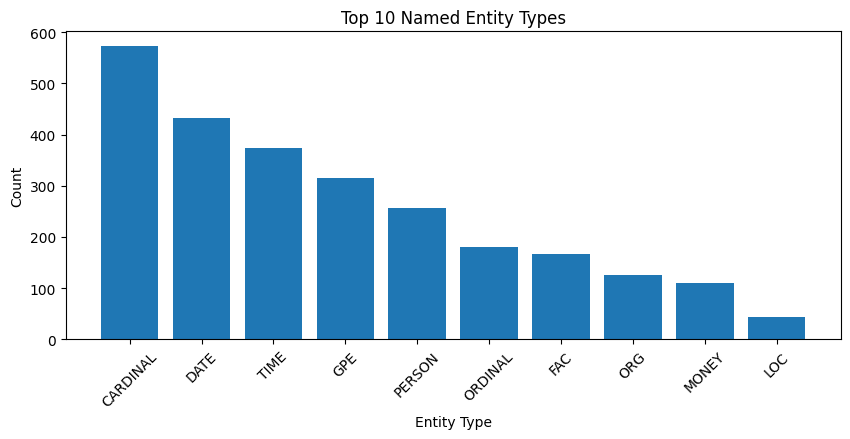

In [ ]:
# Named entity distribution
labels, counts = zip(*ner_counts.most_common(10))
plt.figure(figsize=(10,4))
plt.bar(labels, counts)
plt.xticks(rotation=45)
plt.title("Top 10 Named Entity Types")
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.show()

**Analysis**:

From the graph, we have:

- High counts of entities with highest in CARDINAL, followed by DATE, TIME, and GPE suggest temporal and geographical references are prevalent.

- Frequent mentions of GPE like San Francisco (from previous graph) align with location-based hotel reviews.

# **III. Topic Modeling**

Topic modeling is a powerful method for analyzing texts and large collections of data in a reproducible manner. As an algorithmic model, it can extract latent semantics from a set of documents. In this model, we will explore 3 algorithms of this technique to identify meaningful topics of the dataset.

In [ ]:
# Loading data
df_topicmodeling = pd.read_csv("/content/cleaned_merge_data_advanced_v2.csv")
df_topicmodeling.head()

,id,original_reviews,reviews,platform,cleaned_advanced,emotion_classify,topics
0,1,Great location. Great service. Rooms are nice....,great location. great service. rooms are nice....,google map,great location great service nice everyone wor...,Positive,Friendly Staff & Exceptional Service
1,2,"Wish they had a microwave and better Wi-Fi, bu...","wish they had a microwave and better wi-fi, bu...",google map,wish microwave better wifi otherwise pretty gr...,Positive,Excellent Location & Nearby Attractions
2,3,Awesome location. Room nice and big. Nice brea...,awesome location. room nice and big. nice brea...,google map,awesome location nice big nice breakfast optio...,Positive,Excellent Location & Nearby Attractions
3,4,We absolutely loved our stay at the the Argona...,we absolutely loved our stay at the the argona...,google map,absolutely loved argonaut fisherman wharf san ...,Positive,Scenic Views & Hotel Aesthetic
4,5,Overall clean hotel and friendly staff. Great ...,overall clean hotel and friendly staff. great ...,google map,overall clean friendly staff great location wa...,Positive,Excellent Location & Nearby Attractions


## **1. LDA**

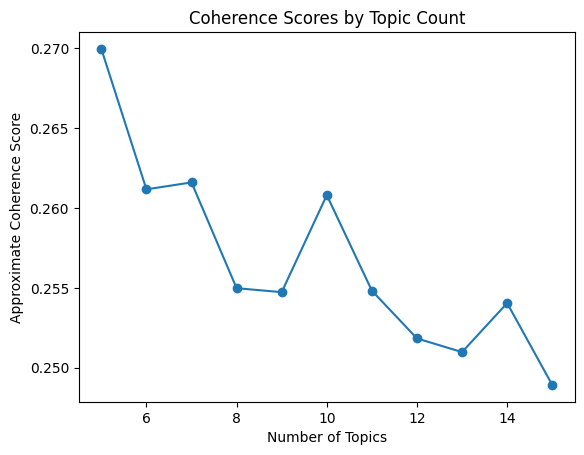

Best number of topics: 5
Highest coherence score: 0.2700
Topic 1:
wharf, location, fisherman, car, great, cable, restaurant, right, pier, staff
Topic 2:
nice, really, staff, day, like, didnt, location, night, time, good
Topic 3:
parking, night, desk, service, time, fee, location, area, bed, valet
Topic 4:
view, love, san, francisco, mermaid, lobby, water, blue, staff, like
Topic 5:
great, location, staff, argonaut, san, francisco, service, restaurant, friendly, excellent


In [ ]:
# Vectorize text
vectorizer = CountVectorizer(max_df=0.85, min_df=0.01, stop_words='english')
X = vectorizer.fit_transform(df_topicmodeling['cleaned_advanced'])
feature_names = vectorizer.get_feature_names_out()

# Extract top words per topic
def get_topics_words(model, feature_names, top_n=10):
    return [[feature_names[i] for i in topic.argsort()[:-top_n - 1:-1]] for topic in model.components_]

# Approximate coherence score using cosine similarity
def simple_coherence(topics, X, feature_names):
    term_matrix = X.T.toarray()
    term_matrix = normalize(term_matrix, axis=1)
    scores = []
    for topic in topics:
        indices = [np.where(feature_names == word)[0][0] for word in topic if word in feature_names]
        if len(indices) > 1:
            sims = cosine_similarity(term_matrix[indices])
            upper = sims[np.triu_indices(len(indices), 1)]
            scores.append(np.mean(upper))
    return np.mean(scores) if scores else 0

# Define topic range
topic_range = range(5, 16)  # Includes 5 to 15

scores = []
models = []

# Evaluate models for each topic count
for n in topic_range:
    model = LatentDirichletAllocation(n_components=n, random_state=42)
    model.fit(X)
    topics = get_topics_words(model, feature_names)
    score = simple_coherence(topics, X, feature_names)
    scores.append(score)
    models.append(model)

# Plot coherence scores
plt.plot(topic_range, scores, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Approximate Coherence Score")
plt.title("Coherence Scores by Topic Count")
plt.show()

# Select best model
best_idx = np.argmax(scores)
best_model = models[best_idx]

#manual_n=8 #if manually select number of topics
#idx = list(topic_range).index(manual_n)
#best_model = models[idx]

best_n = topic_range[best_idx]
print(f"Best number of topics: {best_n}")
print(f"Highest coherence score: {scores[best_idx]:.4f}")

# Print topics
def print_topics(model, vectorizer, top_n=10):
    words = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx + 1}:")
        print(", ".join([words[i] for i in topic.argsort()[:-top_n - 1:-1]]))

print_topics(best_model, vectorizer)

**Insight**:

From the coherence scores graph, the model with five topics provided the optimal balance between topic interpretability and semantic separation. Although the overall coherence score was modest (0.2700), it was the highest among all tested models, indicating relatively well-defined thematic structures. Models with more than five topics showed a decline in coherence.

**Summary of LDA Topics with the support of ChatGPT:**  

**Topic 1: Excellent Location & Nearby Attractions**

Keywords: wharf, location, fisherman, pier, car, great, cable, restaurant, right, staff

Summary: Guests frequently praise the hotel’s prime location near Fisherman's Wharf and other local attractions. The hotel is near to cable cars, piers, and dining options enhances the overall convenience and appeal of the stay.

**Topic 2: Friendly Staff & Comfortable Experience**

Keywords: nice, really, staff, day, like, didnt, location, night, time, good

Summary: Visitors highlight the friendliness and helpfulness of the staff. The experience is generally described as comfortable and pleasant.

**Topic 3: Parking & Service Concerns**

Keywords: parking, night, desk, service, time, fee, location, area, bed, valet

Summary: Some guests express concerns about parking logistics and added fees. While the overall stay is positive, parking and valet services are occasionally noted as areas for improvement.

**Topic 4: Scenic Views & Hotel Aesthetic**

Keywords: view, love, san, francisco, mermaid, lobby, water, blue, staff, like

Summary: Guests appreciate the hotel’s visual charm, including scenic views of San Francisco’s waterfront. Decor elements like the blue theme and mermaid design create a unique and enjoyable ambiance.

**Topic 5: High-Quality Service & Overall Satisfaction**

Keywords: great, location, staff, argonaut, san, francisco, service, restaurant, friendly, excellent

Summary: Guests consistently express high satisfaction with the overall quality of service and the friendliness of the staff.

In [ ]:
# Visualize using pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.lda_model.prepare(best_model, X, vectorizer)
pyLDAvis.display(vis)

From the chart above, it shows how distinct topics are in 2D space using multidimensional scaling (MDS):

- Topic 1 and 2 (Red & Light Blue): They overlap in some part suggesting they share similar keywords/themes.

- Topic 3, 4, and 5: These are more separated, indicating better-defined, more distinct themes.

However, topic 1 and topic 5 was quite similar and overlap in many parts. Merging Topic 2 (Friendly Staff & Comfortable Experience) and Topic 5 (High-Quality Service & Overall Satisfaction) makes good sense. Both focus on positive guest experiences with staff, service quality, and overall comfort, and there’s clear overlap in themes like staff friendliness, satisfaction, and general ambiance. Therefore, at the end, there are four topics in this model with the support of ChatGPT.

**Topic 1: Excellent Location & Nearby Attractions**

Keywords: wharf, location, fisherman, pier, car, great, cable, restaurant, right, staff

Summary: Guests frequently praise the hotel’s prime location near Fisherman's Wharf and other local attractions. The hotel is near to cable cars, piers, and dining options enhances the overall convenience and appeal of the stay.

**Topic 2: Friendly Staff & Exceptional Service (Merged Topic)**

Keywords: great, staff, location, nice, really, friendly, service, argonaut, good, excellent

Summary: Reviews consistently highlight the professionalism and friendliness of the staff, as well as overall service quality. Guests describe their experience as welcoming, comfortable, and well-supported by staff.

**Topic 3: Parking & Service Concerns**

Keywords: parking, night, desk, service, time, fee, location, area, bed, valet

Summary: Some guests express concerns about parking logistics and added fees. While the overall stay is positive, parking and valet services are occasionally noted as areas for improvement.

**Topic 4: Scenic Views & Hotel Aesthetic**

Keywords: view, love, san, francisco, mermaid, lobby, water, blue, staff, like

Summary: Guests appreciate the hotel’s visual charm, including scenic views of San Francisco’s waterfront. Decor elements like the blue theme and mermaid design create a unique and enjoyable ambiance.

**Conclusion**

From the LDA topic modelling, after adjustment, there are four main themes in hotel guest reviews. Firstly, Guests highly valued the hotel’s excellent location, particularly its proximity to Fisherman's Wharf and local attractions. Secondly, friendly staff and exceptional service emerged as a key strength, with many reviews praising the welcoming and professional hospitality. However, parking and service concerns were noted by some visitors, particularly regarding fees, but it mostly positive. Lastly, the hotel’s scenic views and unique aesthetic, including waterfront sights and themed decor, significantly contributed to the overall positive experience.

### Adjustment For LDA

1. max_df: a parameter which sets threshold for terms that appear too frequently
2. min_df: a parameter which is used to set a threshold for how often a term must appear in documents to be included in the vocabulary

Adjusting max_df and min_df for increasing coherence score, from 0.27 to 0.33

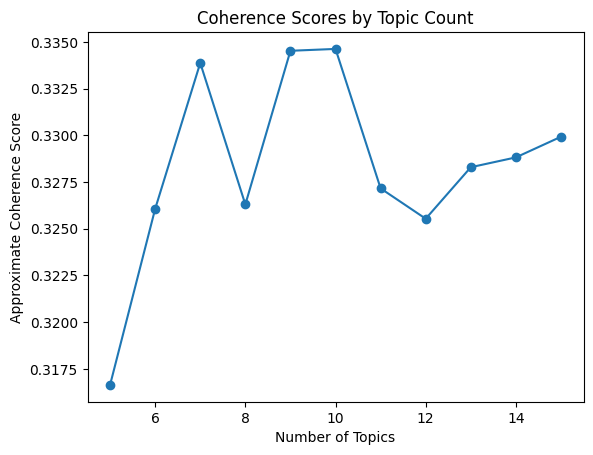

Best number of topics: 10
Highest coherence score: 0.3346
Topic 1:
great, location, wharf, service, fisherman, restaurant, staff, argonaut, view, friendly
Topic 2:
service, location, argonaut, restaurant, great, staff, wharf, clean, view, friendly
Topic 3:
view, location, wharf, staff, fisherman, clean, great, friendly, restaurant, argonaut
Topic 4:
clean, great, location, staff, view, nice, service, wharf, restaurant, friendly
Topic 5:
restaurant, great, location, clean, wharf, nice, fisherman, staff, view, friendly
Topic 6:
friendly, staff, location, clean, great, restaurant, wharf, fisherman, argonaut, view
Topic 7:
wharf, fisherman, location, staff, argonaut, restaurant, clean, friendly, great, view
Topic 8:
staff, nice, restaurant, friendly, location, clean, great, wharf, service, fisherman
Topic 9:
argonaut, staff, location, great, clean, friendly, view, wharf, restaurant, fisherman
Topic 10:
nice, location, great, clean, staff, wharf, restaurant, friendly, fisherman, view


In [ ]:
# Vectorize text
vectorizer = CountVectorizer(max_df=0.80, min_df=0.20, stop_words='english')
X = vectorizer.fit_transform(df_topicmodeling['cleaned_advanced'])
feature_names = vectorizer.get_feature_names_out()

# Extract top words per topic
def get_topics_words(model, feature_names, top_n=10):
    return [[feature_names[i] for i in topic.argsort()[:-top_n - 1:-1]] for topic in model.components_]

# Approximate coherence score using cosine similarity
def simple_coherence(topics, X, feature_names):
    term_matrix = X.T.toarray()
    term_matrix = normalize(term_matrix, axis=1)
    scores = []
    for topic in topics:
        indices = [np.where(feature_names == word)[0][0] for word in topic if word in feature_names]
        if len(indices) > 1:
            sims = cosine_similarity(term_matrix[indices])
            upper = sims[np.triu_indices(len(indices), 1)]
            scores.append(np.mean(upper))
    return np.mean(scores) if scores else 0

# Define topic range
topic_range = range(5, 16)  # Includes 5 to 15

scores = []
models = []

# Evaluate models for each topic count
for n in topic_range:
    model = LatentDirichletAllocation(n_components=n, random_state=42)
    model.fit(X)
    topics = get_topics_words(model, feature_names)
    score = simple_coherence(topics, X, feature_names)
    scores.append(score)
    models.append(model)

# Plot coherence scores
plt.plot(topic_range, scores, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Approximate Coherence Score")
plt.title("Coherence Scores by Topic Count")
plt.show()

# Select best model
best_idx = np.argmax(scores)
best_model = models[best_idx]

#manual_n=8 #if manually select number of topics
#idx = list(topic_range).index(manual_n)
#best_model = models[idx]

best_n = topic_range[best_idx]
print(f"Best number of topics: {best_n}")
print(f"Highest coherence score: {scores[best_idx]:.4f}")

# Print topics
def print_topics(model, vectorizer, top_n=10):
    words = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx + 1}:")
        print(", ".join([words[i] for i in topic.argsort()[:-top_n - 1:-1]]))

print_topics(best_model, vectorizer)

In [ ]:
# Visualize using pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.lda_model.prepare(best_model, X, vectorizer)
pyLDAvis.display(vis)

In our analysis, we chose the result with a coherence score of 0.27, even though another model with higher cohernece score, because the 5-topic solution produced clearer, more interpretable, and meaningful topics. Fewer topics helps avoid over-segmentation and ensure each topic is distinct and relevant to our research goals. In contrast, the 10-topic resulted in significant overlap and among topics, making interpretation more difficult, although higher in coherence score.

## **2. NMF**

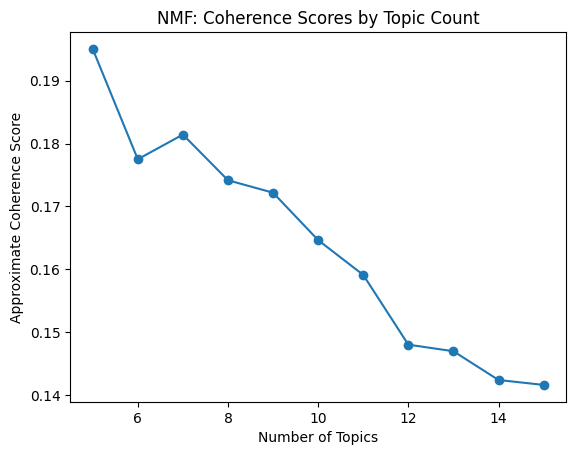

Best number of topics: 5
Highest coherence score: 0.1950
Topic 1:
wharf, fisherman, car, cable, right, walk, pier, restaurant, square, bridge
Topic 2:
great, location, nice, staff, good, definitely, restaurant, friendly, awesome, clean
Topic 3:
night, nice, like, day, time, bed, really, good, didnt, area
Topic 4:
san, francisco, staff, argonaut, friendly, wonderful, helpful, place, amazing, perfect
Topic 5:
service, excellent, customer, location, restaurant, clean, distance, food, walking, recommend


In [ ]:
# Vectorize text
# vectorizer = CountVectorizer(max_df=0.85, min_df=0.01, stop_words='english')
# X = vectorizer.fit_transform(df['cleaned_advanced'])
# feature_names = vectorizer.get_feature_names_out()

# TF-IDF
vectorizer = TfidfVectorizer(max_df=0.85, min_df=0.01, stop_words='english')
X = vectorizer.fit_transform(df_topicmodeling['cleaned_advanced'])
feature_names = vectorizer.get_feature_names_out()

# Extract top words per topic
def get_topics_words(model, feature_names, top_n=10):
    return [[feature_names[i] for i in topic.argsort()[:-top_n - 1:-1]] for topic in model.components_]

# Approximate coherence score using cosine similarity
def simple_coherence(topics, X, feature_names):
    term_matrix = X.T.toarray()
    term_matrix = normalize(term_matrix, axis=1)
    scores = []
    for topic in topics:
        indices = [np.where(feature_names == word)[0][0] for word in topic if word in feature_names]
        if len(indices) > 1:
            sims = cosine_similarity(term_matrix[indices])
            upper = sims[np.triu_indices(len(indices), 1)]
            scores.append(np.mean(upper))
    return np.mean(scores) if scores else 0

# Define topic range
topic_range = range(5, 16)

scores = []
models = []

# Train and evaluate NMF models
for n in topic_range:
    model = NMF(n_components=n, random_state=42)
    model.fit(X)
    topics = get_topics_words(model, feature_names)
    score = simple_coherence(topics, X, feature_names)
    scores.append(score)
    models.append(model)

# Plot coherence scores
plt.plot(topic_range, scores, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Approximate Coherence Score")
plt.title("NMF: Coherence Scores by Topic Count")
plt.show()

# Select best model
best_idx = np.argmax(scores)
best_model = models[best_idx]
best_n = topic_range[best_idx]
print(f"Best number of topics: {best_n}")
print(f"Highest coherence score: {scores[best_idx]:.4f}")

# Optional: manually set number of topics
# manual_n = 8
# idx = list(topic_range).index(manual_n)
# best_model = models[idx]
# best_n = manual_n
# print(f"Manually selected number of topics: {best_n}")

# Print topics
def print_topics(model, vectorizer, top_n=10):
    words = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx + 1}:")
        print(", ".join([words[i] for i in topic.argsort()[:-top_n - 1:-1]]))

print_topics(best_model, vectorizer)

From the graph above, the LDA model achieved its highest coherence score of 0.1950 with 5 topics, indicating this configuration was the most suitable among those tested. However, the relatively low score suggests the resulting topics may lack clarity or distinctiveness.

In addition, from the topics provided below, we can have:

**Summary of NMF Topics with the support of ChatGPT:**

**Topic 1: Tourist Attractions & Waterfront Location**

Keywords: wharf, fisherman, car, cable, right, walk, pier, restaurant, square, bridge

Summary: The popular tourist attractions such as Fisherman’s Wharf, cable cars, the pier, and nearby restaurants. Guests mention easy access by foot or car and enjoy the scenic surroundings.



**Topic 2: Great Location & Friendly Staff**

Keywords: great, location, nice, staff, good, definitely, restaurant, friendly, awesome, clean

Summary: Guests highlight a positive experience, praising the excellent location, friendly staff, and nearby dining options.

**Topic 3: Comfortable Stay & Daily Experience**

Keywords: night, nice, like, day, time, bed, really, good, area

Summary: Focuses on the comfort of the room and the day-to-day guest experience. Mentions of night, bed, and nice imply restful stays, while area and time point to a generally pleasant environment.

**Topic 4: Exceptional Service**

Keywords: san, francisco, staff, argonaut, friendly, wonderful, helpful, place, amazing, perfect

Summary: Specifically praises staff service at the Argonaut Hotel in San Francisco. Guests describe their experience using superlatives like friendly, and wonderful, emphasizing outstanding hospitality and a memorable visit.

**Topic 5: Cleanliness, Dining & Guest Satisfaction**

Keywords: service, excellent, customer, location, restaurant, clean, distance, food, walking, recommend

Summary: Guests appreciate the cleanliness, customer service, and food options nearby. The emphasis on recommends and excellent suggests high guest satisfaction and a good experience in terms of convenience and amenities.

However, due to low score in coherence and the theme of all topics above are quite overlapping. We decided to merge the topics. After reviewing the five original NMF topics, we consolidated them into four more refined topics based on thematic similarity and keyword overlap. The primary goal of the merge was to reduce redundancy and enhance interpretability without losing the nuances captured in the original model output.

**Summary of NMF Topics with the support of ChatGPT:**

**Topic 1: Prime Location & Proximity to Attractions**

Keywords: wharf, fisherman, pier, cable, walk, square, bridge, car, right, restaurant

Summary: Guests praise the excellent location near iconic San Francisco attractions like Fisherman’s Wharf, the pier, and the cable cars. Easy walking access to these sites makes it ideal for tourists.

**Topic 2: Friendly Staff & Memorable Service**

Keywords: staff, friendly, helpful, amazing, wonderful, argonaut, san, francisco, place, perfect

Summary: Visitors praise the warm, welcoming staff and great service. The hotel is seen as a standout choice for hospitality in San Francisco.

**Topic 3: Comfort & Atmosphere**

Keywords: night, bed, time, nice, like, really, area, day, didnt, good

Summary: Focuses on the comfort of the room and the day-to-day guest experience. Mentions of night, bed, and nice imply restful stays, while area and time point to a generally pleasant environment.

**Topic 4: Cleanliness, Dining & Recommendations**

Keywords: clean, excellent, restaurant, food, service, recommend, walking, distance, customer, location

Summary: Clean facilities, nearby restaurants, and excellent customer service stand out. Guests recommend others due to its convenience and quality dining options within walking distance.

**Conclusion**

To sum up, after adjustment, the NMF topic modelling revealed four refined themes in guest reviews. Firstly, visitors consistently emphasized the prime location of the hotel, noting easy access to landmarks. In addition, the friendly staff and memorable service stood out, with frequent mentions of warm hospitality. Another key theme was comfort and atmosphere, with guests appreciating restful nights, a pleasant environment, and an overall smooth stay. Lastly, cleanliness, dining, and recommendations surfaced as important, as guests praised the hotel’s cleanliness, convenient access to quality food, and expressed high satisfaction through strong recommendations.

### Adjustment For NMF

Adjusting max_df and min_df for increasing coherence score, from 0.195 to 0.235

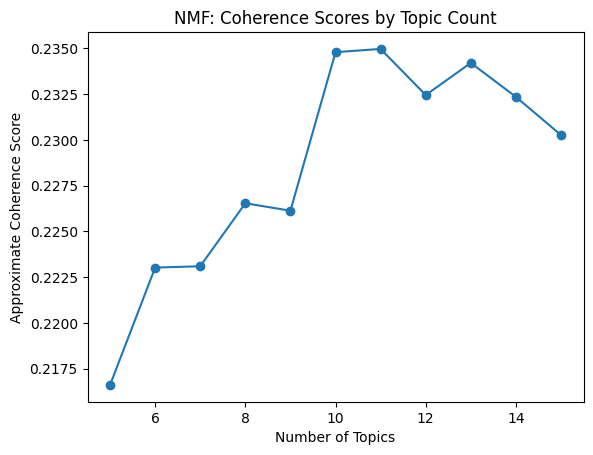

Best number of topics: 11
Highest coherence score: 0.2350
Topic 1:
staff, view, wharf, service, restaurant, nice, location, great, friendly, fisherman
Topic 2:
great, wharf, nice, view, staff, service, restaurant, location, friendly, fisherman
Topic 3:
service, wharf, friendly, view, staff, restaurant, nice, location, great, fisherman
Topic 4:
wharf, fisherman, view, staff, service, restaurant, nice, location, great, friendly
Topic 5:
nice, wharf, view, staff, service, restaurant, location, great, friendly, fisherman
Topic 6:
argonaut, fisherman, wharf, view, staff, service, restaurant, nice, location, great
Topic 7:
view, location, friendly, wharf, staff, service, restaurant, nice, great, fisherman
Topic 8:
location, friendly, wharf, view, staff, service, restaurant, nice, great, fisherman
Topic 9:
restaurant, wharf, friendly, view, staff, service, nice, location, great, fisherman
Topic 10:
clean, wharf, friendly, view, staff, service, restaurant, nice, location, great
Topic 11:
frien

In [ ]:
# Vectorize text
# vectorizer = CountVectorizer(max_df=0.85, min_df=0.01, stop_words='english')
# X = vectorizer.fit_transform(df['cleaned_advanced'])
# feature_names = vectorizer.get_feature_names_out()

# TF-IDF
vectorizer = TfidfVectorizer(max_df=0.85, min_df=0.20, stop_words='english')
X = vectorizer.fit_transform(df_topicmodeling['cleaned_advanced'])
feature_names = vectorizer.get_feature_names_out()

# Extract top words per topic
def get_topics_words(model, feature_names, top_n=10):
    return [[feature_names[i] for i in topic.argsort()[:-top_n - 1:-1]] for topic in model.components_]

# Approximate coherence score using cosine similarity
def simple_coherence(topics, X, feature_names):
    term_matrix = X.T.toarray()
    term_matrix = normalize(term_matrix, axis=1)
    scores = []
    for topic in topics:
        indices = [np.where(feature_names == word)[0][0] for word in topic if word in feature_names]
        if len(indices) > 1:
            sims = cosine_similarity(term_matrix[indices])
            upper = sims[np.triu_indices(len(indices), 1)]
            scores.append(np.mean(upper))
    return np.mean(scores) if scores else 0

# Define topic range
topic_range = range(5, 16)

scores = []
models = []

# Train and evaluate NMF models
for n in topic_range:
    model = NMF(n_components=n, random_state=42)
    model.fit(X)
    topics = get_topics_words(model, feature_names)
    score = simple_coherence(topics, X, feature_names)
    scores.append(score)
    models.append(model)

# Plot coherence scores
plt.plot(topic_range, scores, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Approximate Coherence Score")
plt.title("NMF: Coherence Scores by Topic Count")
plt.show()

# Select best model
best_idx = np.argmax(scores)
best_model = models[best_idx]
best_n = topic_range[best_idx]
print(f"Best number of topics: {best_n}")
print(f"Highest coherence score: {scores[best_idx]:.4f}")

# Optional: manually set number of topics
# manual_n = 8
# idx = list(topic_range).index(manual_n)
# best_model = models[idx]
# best_n = manual_n
# print(f"Manually selected number of topics: {best_n}")

# Print topics
def print_topics(model, vectorizer, top_n=10):
    words = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx + 1}:")
        print(", ".join([words[i] for i in topic.argsort()[:-top_n - 1:-1]]))

print_topics(best_model, vectorizer)

Same reason as **Adjustment For LDA**. The 5-topic solution produced clearer, more interpretable, and meaningful topics. Fewer topics helps avoid over-segmentation and ensure each topic is distinct and relevant to our research goals. In contrast, the 11-topic resulted in significant overlap and among topics, making interpretation more difficult, although higher in coherence score.

## **3. BERTopic**

In [ ]:
# Custom preprocessing: remove stopwords
def preprocess(text):
    tokens = text.lower().split()
    tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS]
    return " ".join(tokens)

# Sample data: replace this with your actual DataFrame and column
# df = pd.read_csv('your_file.csv')
# texts = df['clean_comments'].dropna().tolist()
# texts = df_noclean['reviews'].dropna().tolist()
review_list = df_topicmodeling['reviews'].dropna().tolist()
texts = [preprocess(doc) for doc in review_list]

# Initialize sentence transformer model for embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Fit BERTopic model
topic_model = BERTopic(embedding_model=embedding_model, verbose=True)
topics, probs = topic_model.fit_transform(texts)

# Merge similar topics (threshold controls merging sensitivity)
# topic_model.merge_topics(texts, topics, threshold=0.3)

# Optionally reduce number of topics to a specific number
# topic_model.reduce_topics(texts, nr_topics=12)


# Get topic words for coherence calculation
topic_words = topic_model.get_topics()
formatted_topics = []
for topic_id in sorted(topic_words.keys()):
    if topic_id == -1:
        continue  # Skip outliers
    words = [word for word, _ in topic_words[topic_id]]
    formatted_topics.append(words)

# Prepare inputs for CoherenceModel
tokenized_texts = [text.split() for text in texts]
dictionary = Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Compute coherence score
coherence_model = CoherenceModel(topics=formatted_topics, texts=tokenized_texts,
                                 dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print(f"Coherence Score (c_v): {coherence_score:.4f}")

2025-08-05 05:11:42,848 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/35 [00:00<?, ?it/s]

2025-08-05 05:12:24,563 - BERTopic - Embedding - Completed ✓
2025-08-05 05:12:24,567 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-08-05 05:12:28,917 - BERTopic - Dimensionality - Completed ✓
2025-08-05 05:12:28,918 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-08-05 05:12:28,958 - BERTopic - Cluster - Completed ✓
2025-08-05 05:12:28,963 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-08-05 05:12:29,037 - BERTopic - Representation - Completed ✓
2025-08-05 05:12:29,116 - BERTopic - Topic reduction - Reducing number of topics
2025-08-05 05:12:29,124 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-08-05 05:12:29,193 - BERTopic - Representation - Completed ✓
2025-08-05 05:12:29,196 - BERTopic - Topic reduction - Reduced number of topics from 16 to 12


Coherence Score (c_v): 0.4745


BERTopic model achieved a coherence score of 0.4745, which is considered moderate to strong. This indicates that the topics generated are semantically meaningful and interpretable. When compared to earlier models, like LDA with a coherence score of 0.2700 and MNF with 0.1950. If only consider coherence score, this model shows a significant improvement in capturing coherent topic structure within the data.

In [ ]:
# Visualize topics with distance map
topic_model.visualize_topics()

From the graph above:

However, it is different when it comes to the Intertopic Distance Map. From the map above, the graph shows that the spatial relationships between topics. In the map, some topics are well-separated, indicating that they represent distinct and clearly defined themes. In contrast, many topics on the left side of the map appear tightly clustered, suggesting a high degree of thematic similarity or overlap. This spatial arrangement implies that while the model is effective in capturing distinct themes, it also identifies closely related subtopics that could potentially be merged or grouped under broader thematic categories.  

In [ ]:
# Summary of word scores by each
topic_model.visualize_barchart()

In [ ]:
# Get topic keywords
topics = topic_model.get_topics()

print("BERTopic Topic Summaries:\n")
for topic_id in sorted(topics.keys()):
    if topic_id == -1:
        continue  # Skip outlier topic
    top_words = [word for word, _ in topics[topic_id][:len(topics.keys())]]
    print(f"Topic {topic_id}: {', '.join(top_words)}")

BERTopic Topic Summaries:

Topic 0: wharf, hotel, location, great, san, francisco, stay, friendly, staff, rooms
Topic 1: argonaut, san, hotel, francisco, staff, wharf, stay, room, great, location
Topic 2: hotel, location, great, staff, beautiful, recommend, definitely, nice, service, excellent
Topic 3: argonaut, hotel, stay, staff, room, location, great, friendly, beautiful, stayed
Topic 4: hotel, room, stay, staff, nice, stayed, view, great, location, really
Topic 5: room, it, hotel, parking, charge, charged, extra, night, fees, didn
Topic 6: location, great, excellent, service, nice, rooms, amenities, staff, amazing, view
Topic 7: mermaid, blue, great, hotel, stay, staff, restaurant, food, clean, loved
Topic 8: room, nice, guest, did, desk, security, hotel, blood, rude, key
Topic 9: ghirardelli, square, walk, fisherman, hotel, wharf, restaurants, location, right, you
Topic 10: la, est, di, et, le, es, il, und, che, sehr


From the graph above and the results of BERTopic. Now we have a summary of BERTopic Topics with the support of ChatGPT:

**Topic 1: Wharf Location & Friendly Staff**

Keywords: wharf, hotel, location, great, san, francisco, stay, friendly, staff, rooms

Summary: the hotel is ideal waterfront location near the Wharf and central San Francisco. Guests often praise the friendliness of the staff and comfortable rooms.

**Topic 2: Argonaut Hotel & City Setting**

Keywords: argonaut, san, hotel, francisco, staff, wharf, stay, room, great, location

Summary: Focused on the Argonaut Hotel itself, guests highlight the hotel's brand, excellent location near the Wharf, and solid service/staff. There's a strong association between the hotel and the San Francisco experience.

**Topic 3: Service Excellence & Recommendations**

Keywords: hotel, location, great, staff, beautiful, recommend, definitely, nice, service, excellent

Summary: Guests highlight great service, staff professionalism, and beautiful surroundings. Strong recommendation signals and positive adjectives like “excellent” and “definitely” shows clear satisfaction.

**Topic 4: Argonaut Stay Experience**

Keywords: argonaut, hotel, stay, staff, room, location, great, friendly, beautiful, stayed

Summary: This topic reinforces the overall positive experience of staying at the Argonaut, with emphasis on room quality, friendly staff, and a pleasant, beautiful environment.



**Topic 5: Room Quality & Comfort**

Keywords: hotel, room, stay, staff, nice, stayed, view, great, location, really

Summary: Guests frequently comment on room comfort and views, along with general satisfaction from a well-rounded stay and helpful staff.

**Topic 6: Charges & Parking Concerns**

Keywords: room, it, hotel, parking, charge, charged, extra, night, fees, didn

Summary: Some guests express dissatisfaction about pricing charges such as parking or extra fees. Transparency appears to be an issue.

**Topic 7: Amenities & Scenic Views**

Keywords: location, great, excellent, service, nice, rooms, amenities, staff, amazing, view

Summary: Reviews reflect appreciation for hotel amenities and stunning views. Guests also praise strong service and a generally “amazing” stay.

**Topic 8: Nautical Theme & Food Experience**

Keywords: mermaid, blue, great, hotel, stay, staff, restaurant, food, clean, loved

Summary: Guests enjoy the hotel’s unique aesthetic and nautical theme (e.g., mermaid, blue). Positive mentions of food, cleanliness, and decor indicate a charming, memorable atmosphere.

**Topic 9: Guest Issues & Security Complaints**

Keywords: room, nice, guest, did, desk, security, hotel, blood, rude, key
Summary: This topic covers negative experiences related to guest behavior or security incidents.

**Topic 10: Walkability & Nearby Dining**

Keywords: ghirardelli, square, walk, fisherman, hotel, wharf, restaurants, location, right, you

Summary: Guests value the hotel's walkable access to Ghirardelli Square, Fisherman’s Wharf, and local restaurants. Reviews emphasize convenience and proximity to dining and attractions.

**Topic 11: Non-English Content / Multilingual Noise**

Keywords: la, est, di, et, le, es, il, und, che, sehr

Summary: This topic contains mostly non-English or filler words. It likely reflects multilingual reviews or irrelevant noise and doesn't yield thematic insights.

To enhance clarity and reduce thematic redundancy, the identified topics can be grouped into broader categories.  

- Topic 1 (Location & Attractions) includes Topics 1, 3, 4, 7, and 9, which revolve around the hotel’s proximity to popular destinations like Fisherman’s Wharf and Alcatraz.  

- Topic 2 (Hotel Service & Stay Experience) consists of Topics 0, 2, and 6, covering aspects such as staff friendliness, room comfort, and interior aesthetics like the nautical or mermaid theme.  

- Topic 3 (Concerns & Issues)—comprising Topics 5 and 8 captures customer complaints related to parking difficulties, noise levels, and pricing concerns.  

- Lastly, Topic 4 (Noise/Irrelevant) includes Topic 10, representing non-English content, and Topic 11, which seems to cover miscellaneous or navigational references.

**Conclusion**

Guest reviews of the hotel reveal five major themes. Firstly. The most prominent is the hotel's exceptional location, with visitors praising its proximity to other top San Francisco attractions, and its overall walkability and access to restaurants. Secondly, many guests also highlight the friendly staff and excellent service, with positive experience. In addition, the hotel’s distinctive nautical-themed decor adds to its charm, with mentions of clean rooms, themed aesthetics, and enjoyable on-site dining. However, not all feedback is positive—some reviews mention issues with pricing transparency, such as unexpected parking fees, along with occasional complaints about guest behavior or security concerns. Lastly, a portion of the content consists of non-English or filler text, which does not contribute meaningfully to the overall thematic insights.

## **4. Conclusion**

To sum up, in evaluating topic modeling methods for our dataset of 1,120 hotel customer reviews, comprising mostly short to medium-length texts, we compared Latent Dirichlet Allocation (LDA), Non-negative Matrix Factorization (NMF), and BERTopic. LDA proved to be the most straightforward and practical for our dataset of hotel customer reviews. Although BERTopic yields a higher coherence score, its output in this case suffered from topic redundancy and overlap, which reduces business interpretability.

In addition, LDA, on the other hand, produced fewer but clearer and more distinct topics. These could be easily grouped, labeled, and mapped to business functions such as housekeeping, customer service, or room amenities. Despite a lower coherence score, the human sense and practical actionability of LDA’s results make it more suitable for real-world business application.

Therefore, 4 topics from LDA would be used for sentiment analysis and validation with clustering in later parts of this paper.

Topic 1: Excellent Location & Nearby Attractions

Topic 2: Friendly Staff & Exceptional Service  

Topic 3: Parking & Service Concerns

Topic 4: Scenic Views & Hotel Aesthetic

# **IV. Sentiment Analysis**

From 1120 records, we have:
- topic 1: Friendly Staff & Exceptional Service with 348 records
- topic 2: Excellent Location & Nearby Attractions with 477 records
- topic 3: Parking & Service Concerns with 113 records
- topic 4: Scenic Views & Hotel Aesthetic with 114 records
- 38 records is Uncategorized

## **1. TextBlob**

Implement Instructions
* Step 1: Clean the raw data
* Step 2: Setup the functions for getting subjectivity, polarity, and sentiment analysis output by TextBlob
* Step 3: Make a bar chart for showing the relationship between sentiment outputs


Except analyzing all reviews, analyze reviews which are split by topics

In [ ]:
# df_sentiment_analysis = pd.read_csv("/content/cleaned_merge_data_advanced_v2.csv")
df_sentiment_analysis = df_topicmodeling

In [ ]:
# Define a sentiment_analysis function that calculates subjectivity, polarity and give it a score based on the threshold you want to set.
def sentiment_analysis(text):

  #Create a function to get the subjectivity
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

 #Create a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity

 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 df_sentiment_analysis['TextBlob_Subjectivity'] = text.apply(getSubjectivity )
 df_sentiment_analysis['TextBlob_Polarity'] = text.apply(getPolarity)

 #Transform scores to text-based sentiment labels
 def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
 df_sentiment_analysis['TextBlob_Analysis'] = df_sentiment_analysis['TextBlob_Polarity'].apply(getAnalysis)
 return df_sentiment_analysis

In [ ]:
# Analysis cleanned reviews to get subjectivity, polarity, and output
sentiment_analysis(df_sentiment_analysis['cleaned_advanced'])
df_sentiment_analysis.head()

,id,original_reviews,reviews,platform,cleaned_advanced,emotion_classify,topics,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,1,Great location. Great service. Rooms are nice....,great location. great service. rooms are nice....,google map,great location great service nice everyone wor...,Positive,Friendly Staff & Exceptional Service,0.758000,0.632000,Positive
1,2,"Wish they had a microwave and better Wi-Fi, bu...","wish they had a microwave and better wi-fi, bu...",google map,wish microwave better wifi otherwise pretty gr...,Positive,Excellent Location & Nearby Attractions,0.562500,0.387500,Positive
2,3,Awesome location. Room nice and big. Nice brea...,awesome location. room nice and big. nice brea...,google map,awesome location nice big nice breakfast optio...,Positive,Excellent Location & Nearby Attractions,0.655556,0.438889,Positive
3,4,We absolutely loved our stay at the the Argona...,we absolutely loved our stay at the the argona...,google map,absolutely loved argonaut fisherman wharf san ...,Positive,Scenic Views & Hotel Aesthetic,0.780952,0.442857,Positive
4,5,Overall clean hotel and friendly staff. Great ...,overall clean hotel and friendly staff. great ...,google map,overall clean friendly staff great location wa...,Positive,Excellent Location & Nearby Attractions,0.507143,0.263095,Positive


<Axes: title={'center': 'Sentiment Analysis'}, xlabel='TextBlob_Analysis'>

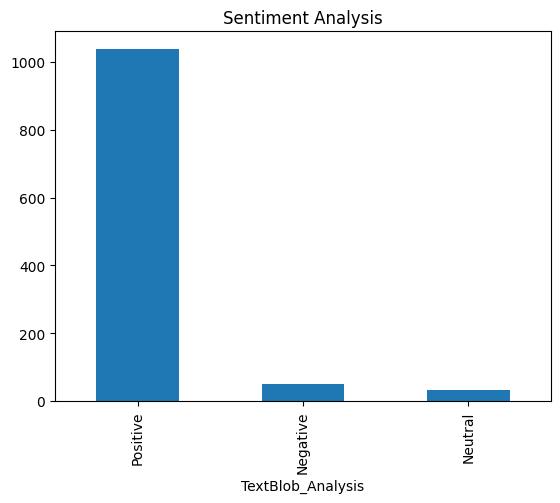

In [ ]:
# Make a barchart to show the relationship between sentiment outputs for all reviews
df_sentiment_analysis['TextBlob_Analysis'].value_counts()
df_sentiment_analysis['TextBlob_Analysis'].value_counts().plot(kind='bar',title="Sentiment Analysis")

From the graph:
In general, it is clear that most of reviews from dataset when running TextBlob is positive

### Reviews with Topic 1: Excellent Location & Nearby Attractions

In [ ]:
# Collect the reviews with topic "Excellent Location & Nearby Attractions" to do sentiment analysis
df_textblob_topic01 = df_sentiment_analysis[df_sentiment_analysis['topics'] == 'Excellent Location & Nearby Attractions']
df_textblob_topic01.head()

,id,original_reviews,reviews,platform,cleaned_advanced,emotion_classify,topics,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
1,2,"Wish they had a microwave and better Wi-Fi, bu...","wish they had a microwave and better wi-fi, bu...",google map,wish microwave better wifi otherwise pretty gr...,Positive,Excellent Location & Nearby Attractions,0.562500,0.387500,Positive
2,3,Awesome location. Room nice and big. Nice brea...,awesome location. room nice and big. nice brea...,google map,awesome location nice big nice breakfast optio...,Positive,Excellent Location & Nearby Attractions,0.655556,0.438889,Positive
4,5,Overall clean hotel and friendly staff. Great ...,overall clean hotel and friendly staff. great ...,google map,overall clean friendly staff great location wa...,Positive,Excellent Location & Nearby Attractions,0.507143,0.263095,Positive
5,6,Fantastic on all fronts. Super comfortable bed...,fantastic on all fronts. super comfortable bed...,google map,fantastic front super comfortable bed size per...,Positive,Excellent Location & Nearby Attractions,0.730000,0.373333,Positive
7,8,We stayed at this hotel recently. The staff is...,we stayed at this hotel recently. the staff is...,google map,stayed recently staff extremely helpful joanna...,Positive,Excellent Location & Nearby Attractions,0.716667,0.158333,Positive


In [ ]:
# Print out the the count of positive, negative, and neutral when reviews with topic 1
df_textblob_topic01['TextBlob_Analysis'].value_counts()

,count
TextBlob_Analysis,
Positive,464
Neutral,7
Negative,6


<Axes: title={'center': 'Topic 1: Excellent Location & Nearby Attractions'}, xlabel='TextBlob_Analysis'>

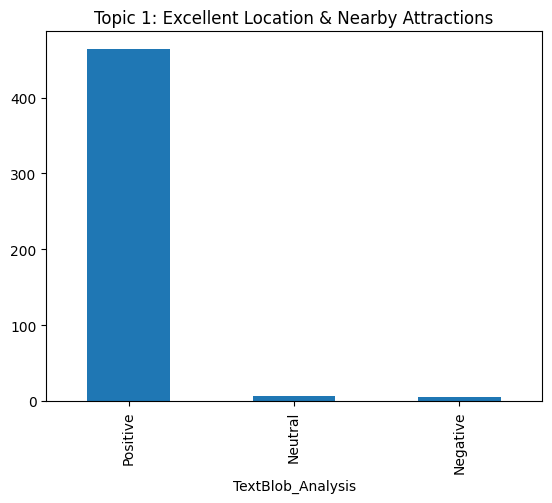

In [ ]:
# Make a barchart to show the relationship between sentiment outputs for reviews with topic 1
df_textblob_topic01['TextBlob_Analysis'].value_counts().plot(kind='bar',title="Topic 1: Excellent Location & Nearby Attractions")

This bar chart shows that most reviews are positive, with a significant minority of neutral and negativve feedbacks.

### Reviews with Topic 2: Friendly Staff & Exceptional Service

In [ ]:
# Collect the reviews with topic "Friendly Staff & Exceptional Service" to do sentiment analysis
df_textblob_topic02 = df_sentiment_analysis[df_sentiment_analysis['topics'] == 'Friendly Staff & Exceptional Service']
df_textblob_topic02.head()

,id,original_reviews,reviews,platform,cleaned_advanced,emotion_classify,topics,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,1,Great location. Great service. Rooms are nice....,great location. great service. rooms are nice....,google map,great location great service nice everyone wor...,Positive,Friendly Staff & Exceptional Service,0.758000,0.632000,Positive
6,7,We stayed at this wonderful hotel this week fo...,we stayed at this wonderful hotel this week fo...,google map,stayed wonderful week day well located prime a...,Positive,Friendly Staff & Exceptional Service,0.500000,0.458333,Positive
8,9,Wonderful stay at the Argonaut Hotel. Truly t...,wonderful stay at the argonaut hotel. truly t...,google map,wonderful argonaut truly topnotch professional...,Positive,Friendly Staff & Exceptional Service,0.531481,0.466667,Positive
15,16,First time in San Francisco and this hotel did...,first time in san francisco and this hotel did...,google map,first time san francisco disappoint great loca...,Positive,Friendly Staff & Exceptional Service,0.616667,0.485000,Positive
18,19,The location is fantastic and the hotel is lov...,the location is fantastic and the hotel is lov...,google map,location fantastic lovely everyone friendly sp...,Positive,Friendly Staff & Exceptional Service,0.662500,0.318750,Positive


In [ ]:
# Print out the the count of positive, negative, and neutral when reviews with topic 2
df_textblob_topic02['TextBlob_Analysis'].value_counts()

,count
TextBlob_Analysis,
Positive,334
Negative,12
Neutral,2


<Axes: title={'center': 'Topic 2: Friendly Staff & Exceptional Service'}, xlabel='TextBlob_Analysis'>

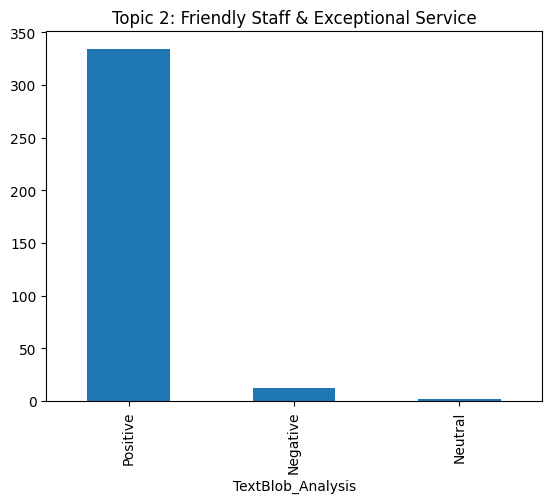

In [ ]:
# Make a barchart to show the relationship between sentiment outputs for reviews with topic 2
df_textblob_topic02['TextBlob_Analysis'].value_counts().plot(kind='bar',title="Topic 2: Friendly Staff & Exceptional Service")

This bar chart shows that most reviews are positive, with a significant minority of neutral and negativve feedbacks.

### Reviews with Topic 3: Parking & Service Concerns

In [ ]:
# Collect the reviews with topic "Parking & Service Concerns" to do sentiment analysis
df_textblob_topic03 = df_sentiment_analysis[df_sentiment_analysis['topics'] == 'Parking & Service Concerns']
df_textblob_topic03.head()

,id,original_reviews,reviews,platform,cleaned_advanced,emotion_classify,topics,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
11,12,"We loved staying here. It was clean, comfortab...","we loved staying here. it was clean, comfortab...",google map,loved staying clean comfortable perfect locati...,Positive,Parking & Service Concerns,0.525926,0.262963,Positive
12,13,"We had high hopes staying here, however our ex...","we had high hopes staying here, however our ex...",google map,high hope staying however experience full star...,Neutral,Parking & Service Concerns,0.527143,-0.016429,Negative
14,15,The Argunot is a very special hotel in a very ...,the argunot is a very special hotel in a very ...,google map,argunot special touristy area centrally locate...,Positive,Parking & Service Concerns,0.717347,0.351020,Positive
16,17,"When we first entered our room, we immediately...","when we first entered our room, we immediately...",google map,first entered immediately noticed blood outsid...,Neutral,Parking & Service Concerns,0.404762,0.064732,Positive
28,29,Everything was ok until the check-out time the...,everything was ok until the check-out time the...,google map,everything ok checkout time th june charge bre...,Negative,Parking & Service Concerns,0.655303,-0.140909,Negative


In [ ]:
# Print out the the count of positive, negative, and neutral when reviews with topic 3
df_textblob_topic03['TextBlob_Analysis'].value_counts()

,count
TextBlob_Analysis,
Positive,93
Negative,17
Neutral,3


<Axes: title={'center': 'Topic 3: Parking & Service Concerns'}, xlabel='TextBlob_Analysis'>

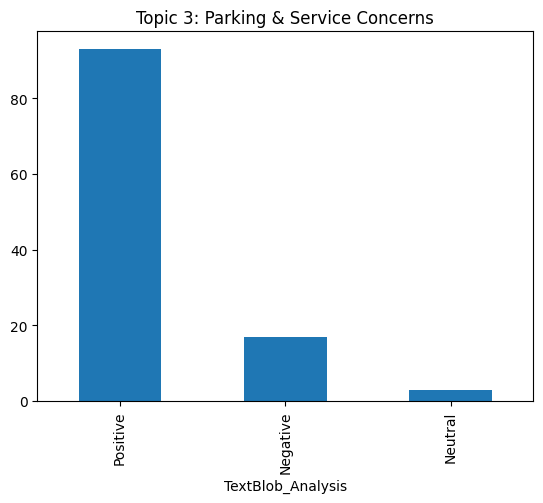

In [ ]:
# Make a barchart to show the relationship between sentiment outputs for reviews with topic 3
df_textblob_topic03['TextBlob_Analysis'].value_counts().plot(kind='bar',title="Topic 3: Parking & Service Concerns")

This bar chart shows that most reviews are positive, followung by negative sentiment. The significant minority of dataset is neutral feedbacks.

### Reviews with Topic 4: Scenic Views & Hotel Aesthetic

In [ ]:
# Collect the reviews with topic "Scenic Views & Hotel Aesthetic" to do sentiment analysis
df_textblob_topic04 = df_sentiment_analysis[df_sentiment_analysis['topics'] == 'Scenic Views & Hotel Aesthetic']
df_textblob_topic04.head()

,id,original_reviews,reviews,platform,cleaned_advanced,emotion_classify,topics,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
3,4,We absolutely loved our stay at the the Argona...,we absolutely loved our stay at the the argona...,google map,absolutely loved argonaut fisherman wharf san ...,Positive,Scenic Views & Hotel Aesthetic,0.780952,0.442857,Positive
9,10,The Argonaut Hotel is a wonderful place to sta...,the argonaut hotel is a wonderful place to sta...,google map,argonaut wonderful place visit san francisco l...,Positive,Scenic Views & Hotel Aesthetic,0.680000,0.493333,Positive
44,45,This was the perfect place for our family of f...,this was the perfect place for our family of f...,google map,perfect place family four first visit san fran...,Positive,Scenic Views & Hotel Aesthetic,0.711111,0.550000,Positive
75,78,Be prepared to pay $85 a night for parking. On...,"dinner at the restaurant, did not stay at the ...",google map,dinner restaurant small value price water glas...,Negative,Scenic Views & Hotel Aesthetic,0.500000,-0.275000,Negative
82,85,"Check in was great, Steven is very professiona...",super clean rooms and quiet for san francisco ...,google map,super clean quiet san francisco whether outwar...,Positive,Scenic Views & Hotel Aesthetic,0.500000,0.425000,Positive


In [ ]:
# Print out the the count of positive, negative, and neutral when reviews with topic 4
df_textblob_topic04['TextBlob_Analysis'].value_counts()

,count
TextBlob_Analysis,
Positive,128
Negative,11
Neutral,5


<Axes: title={'center': 'Topic 4: Scenic Views & Hotel Aesthetic'}, xlabel='TextBlob_Analysis'>

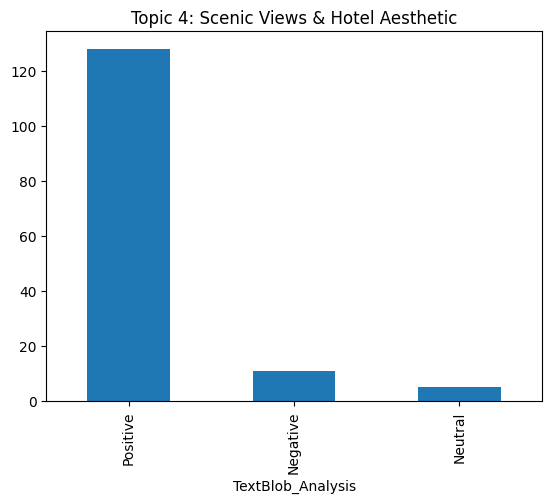

In [ ]:
# Make a barchart to show the relationship between sentiment outputs for reviews with topic 4
df_textblob_topic04['TextBlob_Analysis'].value_counts().plot(kind='bar',title="Topic 4: Scenic Views & Hotel Aesthetic")

This bar chart shows that most reviews are positive, with a very small number in neutral and negativve feedbacks.

## **2. VADER**

Implement Instructions
* Step 1: Clean the raw data
* Step 2: Setup the functions for getting VADER Scores, Compound, and sentiment analysis output by VADER
* Step 3: Make a bar chart for showing the relationship between sentiment outputs


Except analyzing all reviews, analyze reviews which are split by topics

In [ ]:
# Setup the sentiment analyzer for VADER
sid = SentimentIntensityAnalyzer()

In [ ]:
# Calculate score for getting sentiment analysis output
df_sentiment_analysis['VADER_Scores'] = df_sentiment_analysis['cleaned_advanced'].apply(lambda Description: sid.polarity_scores(Description))  # Getting VADER Scores
df_sentiment_analysis.head()

df_sentiment_analysis['VADER_compound'] = df_sentiment_analysis['VADER_Scores'].apply(lambda score_dict: score_dict['compound']) # Based on compound which under VADER Scores to get VADER compound
df_sentiment_analysis['VADER_Analysis']=''
df_sentiment_analysis.loc[df_sentiment_analysis.VADER_compound>0,'VADER_Analysis']='Positive'  # If VADER_compound great than 0, set VADER_Analysis as Positive
df_sentiment_analysis.loc[df_sentiment_analysis.VADER_compound==0,'VADER_Analysis']='Neutral'  # If VADER_compound equal to 0, set VADER_Analysis as Neutral
df_sentiment_analysis.loc[df_sentiment_analysis.VADER_compound<0,'VADER_Analysis']='Negative'  # If VADER_compound less than 0, set VADER_Analysis as Negative

df_sentiment_analysis.head()

,id,original_reviews,reviews,platform,cleaned_advanced,emotion_classify,topics,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,VADER_Scores,VADER_compound,VADER_Analysis
0,1,Great location. Great service. Rooms are nice....,great location. great service. rooms are nice....,google map,great location great service nice everyone wor...,Positive,Friendly Staff & Exceptional Service,0.758000,0.632000,Positive,"{'neg': 0.0, 'neu': 0.218, 'pos': 0.782, 'comp...",0.9577,Positive
1,2,"Wish they had a microwave and better Wi-Fi, bu...","wish they had a microwave and better wi-fi, bu...",google map,wish microwave better wifi otherwise pretty gr...,Positive,Excellent Location & Nearby Attractions,0.562500,0.387500,Positive,"{'neg': 0.0, 'neu': 0.237, 'pos': 0.763, 'comp...",0.9169,Positive
2,3,Awesome location. Room nice and big. Nice brea...,awesome location. room nice and big. nice brea...,google map,awesome location nice big nice breakfast optio...,Positive,Excellent Location & Nearby Attractions,0.655556,0.438889,Positive,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...",0.9118,Positive
3,4,We absolutely loved our stay at the the Argona...,we absolutely loved our stay at the the argona...,google map,absolutely loved argonaut fisherman wharf san ...,Positive,Scenic Views & Hotel Aesthetic,0.780952,0.442857,Positive,"{'neg': 0.0, 'neu': 0.529, 'pos': 0.471, 'comp...",0.9571,Positive
4,5,Overall clean hotel and friendly staff. Great ...,overall clean hotel and friendly staff. great ...,google map,overall clean friendly staff great location wa...,Positive,Excellent Location & Nearby Attractions,0.507143,0.263095,Positive,"{'neg': 0.0, 'neu': 0.614, 'pos': 0.386, 'comp...",0.8834,Positive


### All Reviews

In [ ]:
# Print out the the count of positive, negative, and neutral for all reviews
df_sentiment_analysis['VADER_Analysis'].value_counts()

,count
VADER_Analysis,
Positive,1033
Negative,57
Neutral,30


<Axes: title={'center': 'sentiment analysis'}, xlabel='VADER_Analysis'>

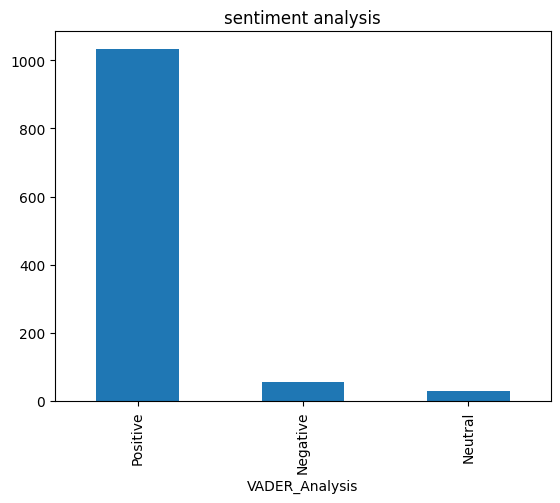

In [ ]:
# Make a barchart to show the relationship between sentiment outputs for all reviews
df_sentiment_analysis.VADER_Analysis.value_counts().plot(kind='bar',title="sentiment analysis")

This bar chart shows that from the dataset, with VADER, most reviews are positive, with a very small number in neutral and negativve feedbacks.

### Reviews with Topic 1: Excellent Location & Nearby Attractions

In [ ]:
# Collect the reviews with topic "Excellent Location & Nearby Attractions" to do sentiment analysis
df_VADER_topic01 = df_sentiment_analysis[df_sentiment_analysis['topics'] == 'Excellent Location & Nearby Attractions']
df_VADER_topic01.head()

,id,original_reviews,reviews,platform,cleaned_advanced,emotion_classify,topics,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,VADER_Scores,VADER_compound,VADER_Analysis
1,2,"Wish they had a microwave and better Wi-Fi, bu...","wish they had a microwave and better wi-fi, bu...",google map,wish microwave better wifi otherwise pretty gr...,Positive,Excellent Location & Nearby Attractions,0.562500,0.387500,Positive,"{'neg': 0.0, 'neu': 0.237, 'pos': 0.763, 'comp...",0.9169,Positive
2,3,Awesome location. Room nice and big. Nice brea...,awesome location. room nice and big. nice brea...,google map,awesome location nice big nice breakfast optio...,Positive,Excellent Location & Nearby Attractions,0.655556,0.438889,Positive,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...",0.9118,Positive
4,5,Overall clean hotel and friendly staff. Great ...,overall clean hotel and friendly staff. great ...,google map,overall clean friendly staff great location wa...,Positive,Excellent Location & Nearby Attractions,0.507143,0.263095,Positive,"{'neg': 0.0, 'neu': 0.614, 'pos': 0.386, 'comp...",0.8834,Positive
5,6,Fantastic on all fronts. Super comfortable bed...,fantastic on all fronts. super comfortable bed...,google map,fantastic front super comfortable bed size per...,Positive,Excellent Location & Nearby Attractions,0.730000,0.373333,Positive,"{'neg': 0.059, 'neu': 0.356, 'pos': 0.585, 'co...",0.9779,Positive
7,8,We stayed at this hotel recently. The staff is...,we stayed at this hotel recently. the staff is...,google map,stayed recently staff extremely helpful joanna...,Positive,Excellent Location & Nearby Attractions,0.716667,0.158333,Positive,"{'neg': 0.0, 'neu': 0.44, 'pos': 0.56, 'compou...",0.9606,Positive


In [ ]:
# Print out the the count of positive, negative, and neutral when reviews with topic 1
df_VADER_topic01['VADER_Analysis'].value_counts()

,count
VADER_Analysis,
Positive,457
Negative,13
Neutral,7


<Axes: title={'center': 'Topic 1: Excellent Location & Nearby Attractions'}, xlabel='VADER_Analysis'>

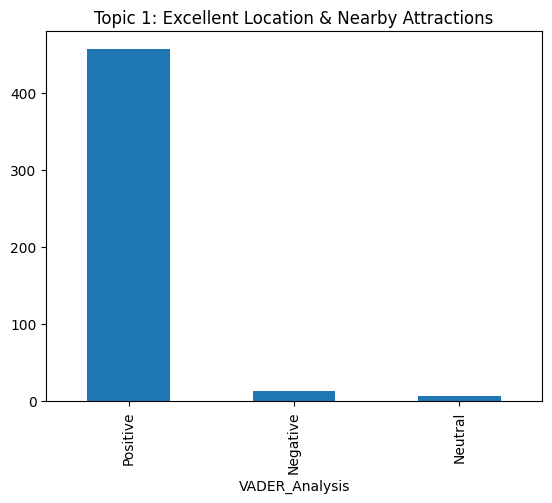

In [ ]:
# Make a barchart to show the relationship between sentiment outputs for reviews with topic 1
df_VADER_topic01.VADER_Analysis.value_counts().plot(kind='bar',title="Topic 1: Excellent Location & Nearby Attractions")

This bar chart shows that most reviews are positive, with a very small number in neutral and negativve feedbacks.

### Reviews with Topic 2: Friendly Staff & Exceptional Service

In [ ]:
# Collect the reviews with topic "Friendly Staff & Exceptional Service" to do sentiment analysis
df_VADER_topic02 = df_sentiment_analysis[df_sentiment_analysis['topics'] == 'Friendly Staff & Exceptional Service']
df_VADER_topic02.head()

,id,original_reviews,reviews,platform,cleaned_advanced,emotion_classify,topics,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,VADER_Scores,VADER_compound,VADER_Analysis
0,1,Great location. Great service. Rooms are nice....,great location. great service. rooms are nice....,google map,great location great service nice everyone wor...,Positive,Friendly Staff & Exceptional Service,0.758000,0.632000,Positive,"{'neg': 0.0, 'neu': 0.218, 'pos': 0.782, 'comp...",0.9577,Positive
6,7,We stayed at this wonderful hotel this week fo...,we stayed at this wonderful hotel this week fo...,google map,stayed wonderful week day well located prime a...,Positive,Friendly Staff & Exceptional Service,0.500000,0.458333,Positive,"{'neg': 0.0, 'neu': 0.407, 'pos': 0.593, 'comp...",0.9607,Positive
8,9,Wonderful stay at the Argonaut Hotel. Truly t...,wonderful stay at the argonaut hotel. truly t...,google map,wonderful argonaut truly topnotch professional...,Positive,Friendly Staff & Exceptional Service,0.531481,0.466667,Positive,"{'neg': 0.0, 'neu': 0.521, 'pos': 0.479, 'comp...",0.9393,Positive
15,16,First time in San Francisco and this hotel did...,first time in san francisco and this hotel did...,google map,first time san francisco disappoint great loca...,Positive,Friendly Staff & Exceptional Service,0.616667,0.485000,Positive,"{'neg': 0.111, 'neu': 0.328, 'pos': 0.561, 'co...",0.9001,Positive
18,19,The location is fantastic and the hotel is lov...,the location is fantastic and the hotel is lov...,google map,location fantastic lovely everyone friendly sp...,Positive,Friendly Staff & Exceptional Service,0.662500,0.318750,Positive,"{'neg': 0.0, 'neu': 0.231, 'pos': 0.769, 'comp...",0.9231,Positive


In [ ]:
# Print out the the count of positive, negative, and neutral when reviews with topic 2
df_VADER_topic02['VADER_Analysis'].value_counts()

,count
VADER_Analysis,
Positive,332
Negative,13
Neutral,3


<Axes: title={'center': 'Topic 2: Friendly Staff & Exceptional Service'}, xlabel='VADER_Analysis'>

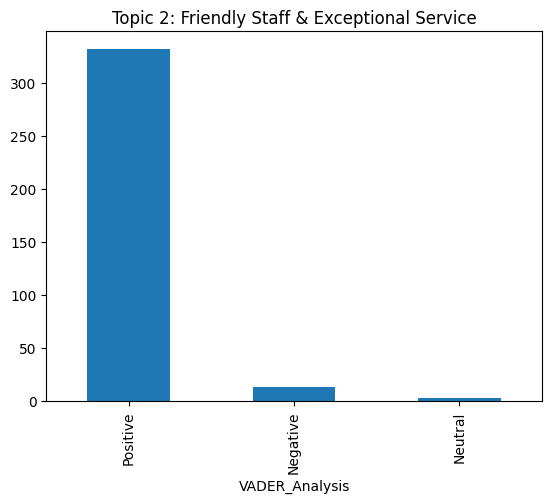

In [ ]:
# Make a barchart to show the relationship between sentiment outputs for reviews with topic 2
df_VADER_topic02.VADER_Analysis.value_counts().plot(kind='bar',title="Topic 2: Friendly Staff & Exceptional Service")

This bar chart shows that the highest review is positive, with a very small number in neutral and negativve feedbacks.

### Reviews with Topic 3: Parking & Service Concerns

In [ ]:
# Collect the reviews with topic "Parking & Service Concerns" to do sentiment analysis
df_VADER_topic03 = df_sentiment_analysis[df_sentiment_analysis['topics'] == 'Parking & Service Concerns']
df_VADER_topic03.head()

,id,original_reviews,reviews,platform,cleaned_advanced,emotion_classify,topics,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,VADER_Scores,VADER_compound,VADER_Analysis
11,12,"We loved staying here. It was clean, comfortab...","we loved staying here. it was clean, comfortab...",google map,loved staying clean comfortable perfect locati...,Positive,Parking & Service Concerns,0.525926,0.262963,Positive,"{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'comp...",0.9509,Positive
12,13,"We had high hopes staying here, however our ex...","we had high hopes staying here, however our ex...",google map,high hope staying however experience full star...,Neutral,Parking & Service Concerns,0.527143,-0.016429,Negative,"{'neg': 0.162, 'neu': 0.561, 'pos': 0.277, 'co...",0.7776,Positive
14,15,The Argunot is a very special hotel in a very ...,the argunot is a very special hotel in a very ...,google map,argunot special touristy area centrally locate...,Positive,Parking & Service Concerns,0.717347,0.351020,Positive,"{'neg': 0.059, 'neu': 0.585, 'pos': 0.356, 'co...",0.9042,Positive
16,17,"When we first entered our room, we immediately...","when we first entered our room, we immediately...",google map,first entered immediately noticed blood outsid...,Neutral,Parking & Service Concerns,0.404762,0.064732,Positive,"{'neg': 0.18, 'neu': 0.638, 'pos': 0.182, 'com...",-0.3810,Negative
28,29,Everything was ok until the check-out time the...,everything was ok until the check-out time the...,google map,everything ok checkout time th june charge bre...,Negative,Parking & Service Concerns,0.655303,-0.140909,Negative,"{'neg': 0.16, 'neu': 0.714, 'pos': 0.126, 'com...",-0.3818,Negative


In [ ]:
# Print out the the count of positive, negative, and neutral when reviews with topic 3
df_VADER_topic03['VADER_Analysis'].value_counts()

,count
VADER_Analysis,
Positive,95
Negative,15
Neutral,3


<Axes: title={'center': 'Topic 3: Parking & Service Concerns'}, xlabel='VADER_Analysis'>

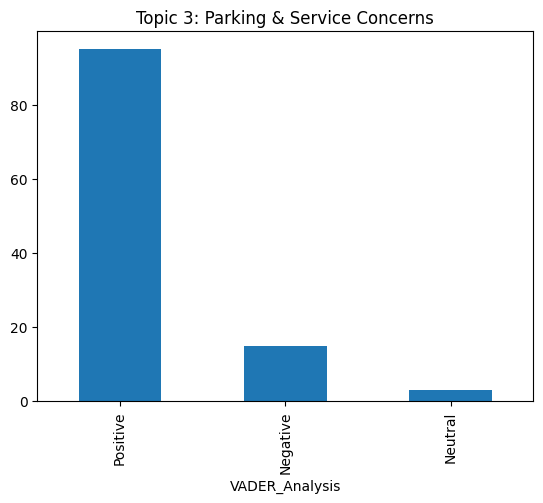

In [ ]:
# Make a barchart to show the relationship between sentiment outputs for reviews with topic 3
df_VADER_topic03.VADER_Analysis.value_counts().plot(kind='bar',title="Topic 3: Parking & Service Concerns")

This bar chart shows that the highest sentiment is Positive, followed by Negative. Neutral has the lowest with very few feedbacks.

### Reviews with Topic 4: Scenic Views & Hotel Aesthetic

In [ ]:
# Collect the reviews with topic "Scenic Views & Hotel Aesthetic" to do sentiment analysis
df_VADER_topic04 = df_sentiment_analysis[df_sentiment_analysis['topics'] == 'Scenic Views & Hotel Aesthetic']
df_VADER_topic04.head()

,id,original_reviews,reviews,platform,cleaned_advanced,emotion_classify,topics,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,VADER_Scores,VADER_compound,VADER_Analysis
3,4,We absolutely loved our stay at the the Argona...,we absolutely loved our stay at the the argona...,google map,absolutely loved argonaut fisherman wharf san ...,Positive,Scenic Views & Hotel Aesthetic,0.780952,0.442857,Positive,"{'neg': 0.0, 'neu': 0.529, 'pos': 0.471, 'comp...",0.9571,Positive
9,10,The Argonaut Hotel is a wonderful place to sta...,the argonaut hotel is a wonderful place to sta...,google map,argonaut wonderful place visit san francisco l...,Positive,Scenic Views & Hotel Aesthetic,0.680000,0.493333,Positive,"{'neg': 0.0, 'neu': 0.522, 'pos': 0.478, 'comp...",0.9716,Positive
44,45,This was the perfect place for our family of f...,this was the perfect place for our family of f...,google map,perfect place family four first visit san fran...,Positive,Scenic Views & Hotel Aesthetic,0.711111,0.550000,Positive,"{'neg': 0.0, 'neu': 0.622, 'pos': 0.378, 'comp...",0.8070,Positive
75,78,Be prepared to pay $85 a night for parking. On...,"dinner at the restaurant, did not stay at the ...",google map,dinner restaurant small value price water glas...,Negative,Scenic Views & Hotel Aesthetic,0.500000,-0.275000,Negative,"{'neg': 0.143, 'neu': 0.739, 'pos': 0.118, 'co...",-0.1280,Negative
82,85,"Check in was great, Steven is very professiona...",super clean rooms and quiet for san francisco ...,google map,super clean quiet san francisco whether outwar...,Positive,Scenic Views & Hotel Aesthetic,0.500000,0.425000,Positive,"{'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...",0.8957,Positive


In [ ]:
# Print out the the count of positive, negative, and neutral when reviews with topic 4
df_VADER_topic04['VADER_Analysis'].value_counts()

,count
VADER_Analysis,
Positive,130
Negative,9
Neutral,5


<Axes: title={'center': 'Topic 4: Scenic Views & Hotel Aesthetic'}, xlabel='VADER_Analysis'>

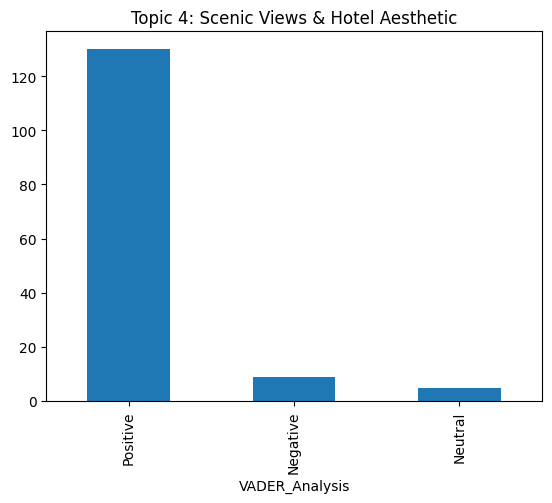

In [ ]:
# Make a barchart to show the relationship between sentiment outputs for reviews with topic 4
df_VADER_topic04.VADER_Analysis.value_counts().plot(kind='bar',title="Topic 4: Scenic Views & Hotel Aesthetic")

This bar chart shows that most reviews are positive, with an insignificant number in neutral and negativve feedbacks.

## **3. BERT**

Implement Instructions
* Step 1: Clean the raw data
* Step 2: Setup the functions for getting BERT results, and converting results to sentiment labels
* Step 3: Make a bar chart for showing the relationship between sentiment outputs


Except analyzing all reviews, analyze reviews which are split by topics

In [ ]:
# Load pre-trained BERT sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Ensure text column is clean
texts = df_sentiment_analysis["cleaned_advanced"].fillna("").astype(str).tolist()

# Apply sentiment analysis
results = sentiment_pipeline(texts, truncation=True, max_length=512)

# Convert results to sentiment labels (e.g., "1 star" to "negative", etc.)
def convert_rating_to_label(result):
    label = result["label"]
    if "1" in label or "2" in label:
        return "Negative"
    elif "3" in label:
        return "Neutral"
    else:
        return "Positive"

# Add results to DataFrame
df_sentiment_analysis["BERT_sentiment"] = [convert_rating_to_label(r) for r in results]

# Optional: preview
print(df_sentiment_analysis[["cleaned_advanced", "BERT_sentiment"]].head())

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


                                    cleaned_advanced BERT_sentiment
0  great location great service nice everyone wor...       Positive
1  wish microwave better wifi otherwise pretty gr...        Neutral
2  awesome location nice big nice breakfast optio...       Positive
3  absolutely loved argonaut fisherman wharf san ...       Positive
4  overall clean friendly staff great location wa...       Positive


### All Reviews

In [ ]:
# Print out the the count of positive, negative, and neutral for all reviews
df_sentiment_analysis["BERT_sentiment"].value_counts()

,count
BERT_sentiment,
Positive,864
Negative,148
Neutral,108


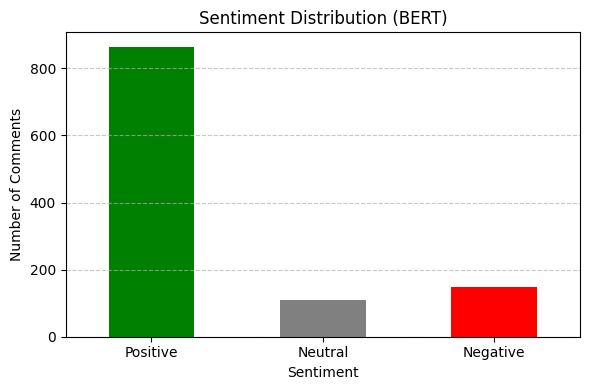

In [ ]:
# Count sentiment categories
sentiment_counts = df_sentiment_analysis["BERT_sentiment"].value_counts().reindex(["Positive", "Neutral", "Negative"], fill_value=0)

# Plot
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind="bar", color=["green", "gray", "red"])
plt.title("Sentiment Distribution (BERT)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This bar chart shows that most reviews are positive. With a very small number in neutral and negativve feedbacks, but it was much more higher than TextBlod and VADER model.

### Reviews with Topic 1: Excellent Location & Nearby Attractions

In [ ]:
# Collect the reviews with topic "Excellent Location & Nearby Attractions" to do sentiment analysis
df_BERT_topic01 = df_sentiment_analysis[df_sentiment_analysis['topics'] == 'Excellent Location & Nearby Attractions']
df_BERT_topic01.head()

,id,original_reviews,reviews,platform,cleaned_advanced,emotion_classify,topics,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,VADER_Scores,VADER_compound,VADER_Analysis,BERT_sentiment
1,2,"Wish they had a microwave and better Wi-Fi, bu...","wish they had a microwave and better wi-fi, bu...",google map,wish microwave better wifi otherwise pretty gr...,Positive,Excellent Location & Nearby Attractions,0.562500,0.387500,Positive,"{'neg': 0.0, 'neu': 0.237, 'pos': 0.763, 'comp...",0.9169,Positive,Neutral
2,3,Awesome location. Room nice and big. Nice brea...,awesome location. room nice and big. nice brea...,google map,awesome location nice big nice breakfast optio...,Positive,Excellent Location & Nearby Attractions,0.655556,0.438889,Positive,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...",0.9118,Positive,Positive
4,5,Overall clean hotel and friendly staff. Great ...,overall clean hotel and friendly staff. great ...,google map,overall clean friendly staff great location wa...,Positive,Excellent Location & Nearby Attractions,0.507143,0.263095,Positive,"{'neg': 0.0, 'neu': 0.614, 'pos': 0.386, 'comp...",0.8834,Positive,Positive
5,6,Fantastic on all fronts. Super comfortable bed...,fantastic on all fronts. super comfortable bed...,google map,fantastic front super comfortable bed size per...,Positive,Excellent Location & Nearby Attractions,0.730000,0.373333,Positive,"{'neg': 0.059, 'neu': 0.356, 'pos': 0.585, 'co...",0.9779,Positive,Positive
7,8,We stayed at this hotel recently. The staff is...,we stayed at this hotel recently. the staff is...,google map,stayed recently staff extremely helpful joanna...,Positive,Excellent Location & Nearby Attractions,0.716667,0.158333,Positive,"{'neg': 0.0, 'neu': 0.44, 'pos': 0.56, 'compou...",0.9606,Positive,Positive


In [ ]:
# Print out the the count of positive, negative, and neutral when reviews with topic 1
df_BERT_topic01["BERT_sentiment"].value_counts()

,count
BERT_sentiment,
Positive,405
Negative,40
Neutral,32


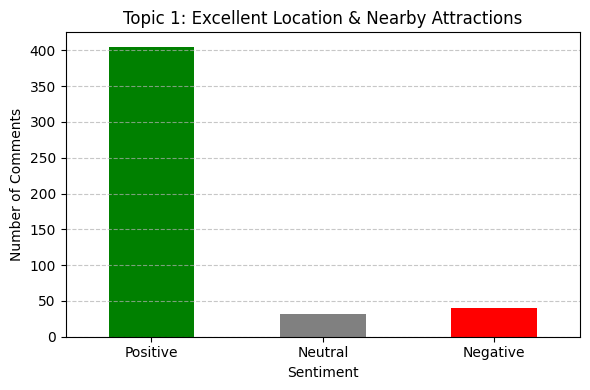

In [ ]:
# Count sentiment categories fot reviews with topic 1
sentiment_topic01_counts = df_BERT_topic01["BERT_sentiment"].value_counts().reindex(["Positive", "Neutral", "Negative"], fill_value=0)

# Plot
plt.figure(figsize=(6, 4))
sentiment_topic01_counts.plot(kind="bar", color=["green", "gray", "red"])
plt.title("Topic 1: Excellent Location & Nearby Attractions")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This bar chart shows that most reviews are positive. The neutral sentiment and negative nearly the same, with a very small number in their feedbacks.

### Reviews with Topic 2: Friendly Staff & Exceptional Service

In [ ]:
# Collect the reviews with topic "Friendly Staff & Exceptional Service" to do sentiment analysis
df_BERT_topic02 = df_sentiment_analysis[df_sentiment_analysis['topics'] == 'Friendly Staff & Exceptional Service']
df_BERT_topic02.head()

,id,original_reviews,reviews,platform,cleaned_advanced,emotion_classify,topics,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,VADER_Scores,VADER_compound,VADER_Analysis,BERT_sentiment
0,1,Great location. Great service. Rooms are nice....,great location. great service. rooms are nice....,google map,great location great service nice everyone wor...,Positive,Friendly Staff & Exceptional Service,0.758000,0.632000,Positive,"{'neg': 0.0, 'neu': 0.218, 'pos': 0.782, 'comp...",0.9577,Positive,Positive
6,7,We stayed at this wonderful hotel this week fo...,we stayed at this wonderful hotel this week fo...,google map,stayed wonderful week day well located prime a...,Positive,Friendly Staff & Exceptional Service,0.500000,0.458333,Positive,"{'neg': 0.0, 'neu': 0.407, 'pos': 0.593, 'comp...",0.9607,Positive,Positive
8,9,Wonderful stay at the Argonaut Hotel. Truly t...,wonderful stay at the argonaut hotel. truly t...,google map,wonderful argonaut truly topnotch professional...,Positive,Friendly Staff & Exceptional Service,0.531481,0.466667,Positive,"{'neg': 0.0, 'neu': 0.521, 'pos': 0.479, 'comp...",0.9393,Positive,Positive
15,16,First time in San Francisco and this hotel did...,first time in san francisco and this hotel did...,google map,first time san francisco disappoint great loca...,Positive,Friendly Staff & Exceptional Service,0.616667,0.485000,Positive,"{'neg': 0.111, 'neu': 0.328, 'pos': 0.561, 'co...",0.9001,Positive,Positive
18,19,The location is fantastic and the hotel is lov...,the location is fantastic and the hotel is lov...,google map,location fantastic lovely everyone friendly sp...,Positive,Friendly Staff & Exceptional Service,0.662500,0.318750,Positive,"{'neg': 0.0, 'neu': 0.231, 'pos': 0.769, 'comp...",0.9231,Positive,Positive


In [ ]:
# Print out the the count of positive, negative, and neutral when reviews with topic 2
df_BERT_topic02["BERT_sentiment"].value_counts()

,count
BERT_sentiment,
Positive,274
Negative,38
Neutral,36


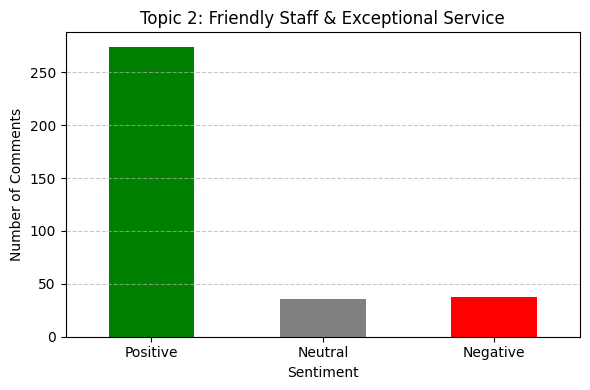

In [ ]:
# Count sentiment categories fot reviews with topic 2
sentiment_topic02_counts = df_BERT_topic02["BERT_sentiment"].value_counts().reindex(["Positive", "Neutral", "Negative"], fill_value=0)

# Plot
plt.figure(figsize=(6, 4))
sentiment_topic02_counts.plot(kind="bar", color=["green", "gray", "red"])
plt.title("Topic 2: Friendly Staff & Exceptional Service")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This bar chart shows that most reviews are positive. The neutral sentiment and negative nearly the same, with a very small number in their feedbacks.

### Reviews with Topic 3: Parking & Service Concerns

In [ ]:
# Collect the reviews with topic "Parking & Service Concerns" to do sentiment analysis
df_BERT_topic03 = df_sentiment_analysis[df_sentiment_analysis['topics'] == 'Parking & Service Concerns']
df_BERT_topic03.head()

,id,original_reviews,reviews,platform,cleaned_advanced,emotion_classify,topics,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,VADER_Scores,VADER_compound,VADER_Analysis,BERT_sentiment
11,12,"We loved staying here. It was clean, comfortab...","we loved staying here. it was clean, comfortab...",google map,loved staying clean comfortable perfect locati...,Positive,Parking & Service Concerns,0.525926,0.262963,Positive,"{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'comp...",0.9509,Positive,Positive
12,13,"We had high hopes staying here, however our ex...","we had high hopes staying here, however our ex...",google map,high hope staying however experience full star...,Neutral,Parking & Service Concerns,0.527143,-0.016429,Negative,"{'neg': 0.162, 'neu': 0.561, 'pos': 0.277, 'co...",0.7776,Positive,Positive
14,15,The Argunot is a very special hotel in a very ...,the argunot is a very special hotel in a very ...,google map,argunot special touristy area centrally locate...,Positive,Parking & Service Concerns,0.717347,0.351020,Positive,"{'neg': 0.059, 'neu': 0.585, 'pos': 0.356, 'co...",0.9042,Positive,Positive
16,17,"When we first entered our room, we immediately...","when we first entered our room, we immediately...",google map,first entered immediately noticed blood outsid...,Neutral,Parking & Service Concerns,0.404762,0.064732,Positive,"{'neg': 0.18, 'neu': 0.638, 'pos': 0.182, 'com...",-0.3810,Negative,Negative
28,29,Everything was ok until the check-out time the...,everything was ok until the check-out time the...,google map,everything ok checkout time th june charge bre...,Negative,Parking & Service Concerns,0.655303,-0.140909,Negative,"{'neg': 0.16, 'neu': 0.714, 'pos': 0.126, 'com...",-0.3818,Negative,Neutral


In [ ]:
# Print out the the count of positive, negative, and neutral when reviews with topic 3
df_BERT_topic03["BERT_sentiment"].value_counts()

,count
BERT_sentiment,
Positive,57
Negative,40
Neutral,16


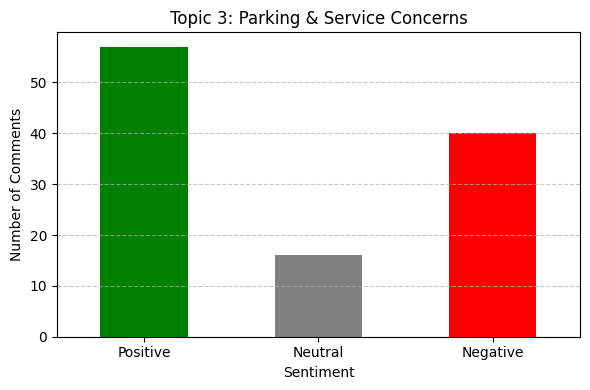

In [ ]:
# Count sentiment categories fot reviews with topic 3
sentiment_topic03_counts = df_BERT_topic03["BERT_sentiment"].value_counts().reindex(["Positive", "Neutral", "Negative"], fill_value=0)

# Plot
plt.figure(figsize=(6, 4))
sentiment_topic03_counts.plot(kind="bar", color=["green", "gray", "red"])
plt.title("Topic 3: Parking & Service Concerns")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Most reviews are positive. Negative sentiment is the second most common, while neutral sentiment is the least frequent among the feedback.

### Reviews with Topic 4: Scenic Views & Hotel Aesthetic

In [ ]:
# Collect the reviews with topic "Scenic Views & Hotel Aesthetic" to do sentiment analysis
df_BERT_topic04 = df_sentiment_analysis[df_sentiment_analysis['topics'] == 'Scenic Views & Hotel Aesthetic']
df_BERT_topic04.head()

,id,original_reviews,reviews,platform,cleaned_advanced,emotion_classify,topics,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,VADER_Scores,VADER_compound,VADER_Analysis,BERT_sentiment
3,4,We absolutely loved our stay at the the Argona...,we absolutely loved our stay at the the argona...,google map,absolutely loved argonaut fisherman wharf san ...,Positive,Scenic Views & Hotel Aesthetic,0.780952,0.442857,Positive,"{'neg': 0.0, 'neu': 0.529, 'pos': 0.471, 'comp...",0.9571,Positive,Positive
9,10,The Argonaut Hotel is a wonderful place to sta...,the argonaut hotel is a wonderful place to sta...,google map,argonaut wonderful place visit san francisco l...,Positive,Scenic Views & Hotel Aesthetic,0.680000,0.493333,Positive,"{'neg': 0.0, 'neu': 0.522, 'pos': 0.478, 'comp...",0.9716,Positive,Positive
44,45,This was the perfect place for our family of f...,this was the perfect place for our family of f...,google map,perfect place family four first visit san fran...,Positive,Scenic Views & Hotel Aesthetic,0.711111,0.550000,Positive,"{'neg': 0.0, 'neu': 0.622, 'pos': 0.378, 'comp...",0.8070,Positive,Positive
75,78,Be prepared to pay $85 a night for parking. On...,"dinner at the restaurant, did not stay at the ...",google map,dinner restaurant small value price water glas...,Negative,Scenic Views & Hotel Aesthetic,0.500000,-0.275000,Negative,"{'neg': 0.143, 'neu': 0.739, 'pos': 0.118, 'co...",-0.1280,Negative,Neutral
82,85,"Check in was great, Steven is very professiona...",super clean rooms and quiet for san francisco ...,google map,super clean quiet san francisco whether outwar...,Positive,Scenic Views & Hotel Aesthetic,0.500000,0.425000,Positive,"{'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...",0.8957,Positive,Positive


In [ ]:
# Print out the the count of positive, negative, and neutral when reviews with topic 4
df_BERT_topic04["BERT_sentiment"].value_counts()

,count
BERT_sentiment,
Positive,104
Negative,23
Neutral,17


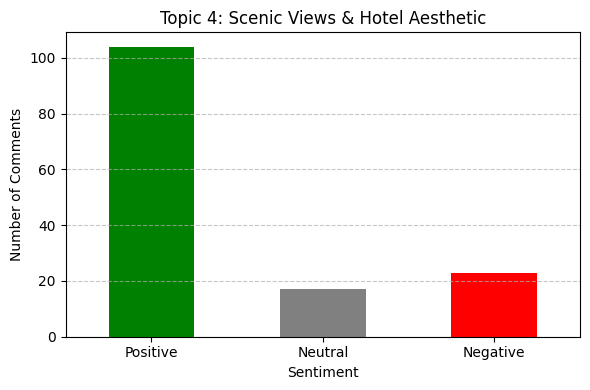

In [ ]:
# Count sentiment categories fot reviews with topic 4
sentiment_topic04_counts = df_BERT_topic04["BERT_sentiment"].value_counts().reindex(["Positive", "Neutral", "Negative"], fill_value=0)

# Plot
plt.figure(figsize=(6, 4))
sentiment_topic04_counts.plot(kind="bar", color=["green", "gray", "red"])
plt.title("Topic 4: Scenic Views & Hotel Aesthetic")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This bar chart shows that most reviews are positive. The neutral sentiment and negative nearly the same, with a very small number in their feedbacks.

## **4. Comparison of Emotion vs TextBlob vs VADER vs BERT Sentiment**

## All Reviews

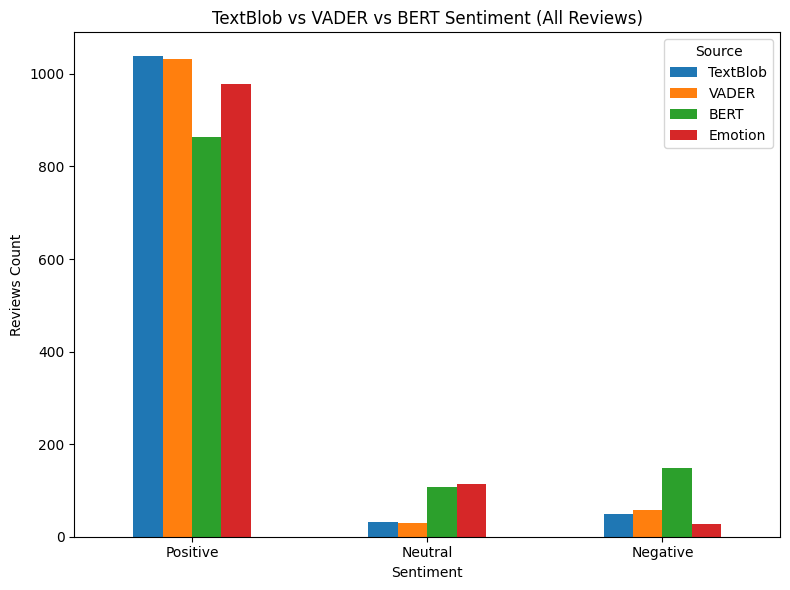

In [ ]:
# Get value counts for all columns
TextBlob_counts = df_sentiment_analysis['TextBlob_Analysis'].value_counts().reindex(["Positive", "Neutral", "Negative"], fill_value=0)
VADER_counts = df_sentiment_analysis['VADER_Analysis'].value_counts().reindex(["Positive", "Neutral", "Negative"], fill_value=0)
BERT_counts = df_sentiment_analysis['BERT_sentiment'].value_counts().reindex(["Positive", "Neutral", "Negative"], fill_value=0)
Emotion_counts = df_sentiment_analysis['emotion_classify'].value_counts().reindex(["Positive", "Neutral", "Negative"], fill_value=0)

# Combine into a single DataFrame for comparison
combined_df = pd.DataFrame({
    'TextBlob': TextBlob_counts,
    'VADER': VADER_counts,
    'BERT': BERT_counts,
    'Emotion': Emotion_counts
}).fillna(0)  # fill NaNs with 0 for categories that are missing in one side

# Plot as a grouped bar chart
combined_df.plot(kind='bar', figsize=(8, 6))
plt.title("TextBlob vs VADER vs BERT Sentiment (All Reviews)")
plt.xlabel("Sentiment")
plt.ylabel("Reviews Count")
plt.xticks(rotation=0)
plt.legend(title="Source")
plt.tight_layout()
plt.show()

Every approach highlights most of the reviews as positive, and TextBlob and VADER have strikingly similar counts. BERT identifies fewer positive reviews, but contrasts with the other models by significantly increasing the counts of neutral and negative reviews. The Emotion method identifies a high number of positive reviews and a considerable number of neutral reviews, but fewer negative ones. In summary, BERT seems to be more sensitive in the classification of neutral and negative sentiments than the other models, while TextBlob and VADER reveal similar, and more forgiving, distributions.

### Calculate The Accuracy (Emotion vs TextBlob)

In [ ]:
# Compare Emotion vs TextBlob
accuracy = accuracy_score(df_sentiment_analysis['emotion_classify'], df_sentiment_analysis['TextBlob_Analysis'])

print(f"Accuracy: {accuracy:.2f}")

print(classification_report(df_sentiment_analysis['emotion_classify'], df_sentiment_analysis['TextBlob_Analysis']))

Accuracy: 0.93
              precision    recall  f1-score   support

    Negative       0.54      1.00      0.70        27
     Neutral       1.00      0.28      0.44       114
    Positive       0.94      1.00      0.97       979

    accuracy                           0.93      1120
   macro avg       0.83      0.76      0.70      1120
weighted avg       0.94      0.93      0.91      1120



The overall accuracy is 93%, indicating high agreement between the two methods. Breaking it down by class, positive sentiment shows excellent precision and recall (0.94 and 1.00), meaning most positive cases are correctly identified. Negative sentiment has perfect recall (1.00) but lower precision (0.54), suggesting some false positives. Neutral sentiment has perfect precision (1.00) but lower recall (0.28), indicating many neutral cases are missed. Overall, the model performs well on positive reviews but struggles more with neutral and negative classes.

### Calculate The Accuracy (Emotion vs VADER)

In [ ]:
# Compare Emotion vs VADER
accuracy = accuracy_score(df_sentiment_analysis['emotion_classify'], df_sentiment_analysis['VADER_Analysis'])

print(f"Accuracy: {accuracy:.2f}")

print(classification_report(df_sentiment_analysis['emotion_classify'], df_sentiment_analysis['VADER_Analysis']))

Accuracy: 0.90
              precision    recall  f1-score   support

    Negative       0.39      0.81      0.52        27
     Neutral       0.80      0.21      0.33       114
    Positive       0.93      0.99      0.96       979

    accuracy                           0.90      1120
   macro avg       0.71      0.67      0.61      1120
weighted avg       0.91      0.90      0.89      1120



The overall accuracy is 90%, indicating strong agreement. For the positive class, VADER performs very well with high precision (0.93) and recall (0.99), meaning most positive reviews are correctly identified. However, the negative and neutral classes show lower precision and recall, especially neutral with recall at only 0.21, suggesting many neutral cases are missed. The negative class has low precision (0.39), indicating false positives. Overall, while positive sentiment detection is strong, VADER struggles more with accurately classifying neutral and negative sentiments compared to Emotion.

### Calculate The Accuracy (Emotion vs BERT)

In [ ]:
# Compare Emotion vs BERT
accuracy = accuracy_score(df_sentiment_analysis['emotion_classify'], df_sentiment_analysis['BERT_sentiment'])

print(f"Accuracy: {accuracy:.2f}")

print(classification_report(df_sentiment_analysis['emotion_classify'], df_sentiment_analysis['BERT_sentiment']))

Accuracy: 0.78
              precision    recall  f1-score   support

    Negative       0.14      0.78      0.24        27
     Neutral       0.21      0.20      0.21       114
    Positive       0.96      0.85      0.90       979

    accuracy                           0.78      1120
   macro avg       0.44      0.61      0.45      1120
weighted avg       0.86      0.78      0.81      1120



The overall accuracy is 78%, lower than previous comparisons. While BERT performs very well on positive sentiment with high precision (0.96) and recall (0.85), it struggles significantly with negative and neutral classes, showing very low precision (0.14 and 0.21) and recall (0.78 and 0.20), respectively. This suggests that BERT misclassifies negative and neutral sentiments, leading to weaker overall performance compared to Emotion.

## Topic 1: Excellent Location & Nearby Attractions

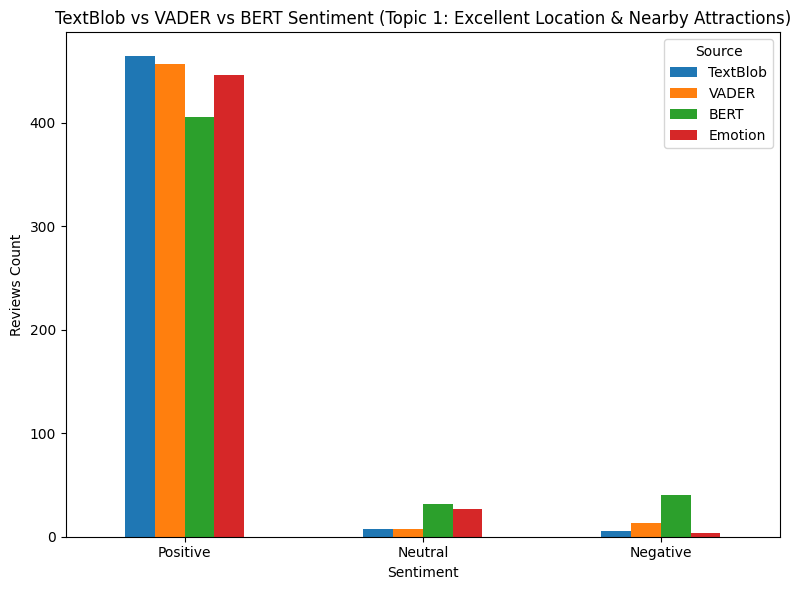

In [ ]:
# Get value counts for topic 1
TextBlob_topic01_counts = df_BERT_topic01['TextBlob_Analysis'].value_counts().reindex(["Positive", "Neutral", "Negative"], fill_value=0)
VADER_topic01_counts = df_BERT_topic01['VADER_Analysis'].value_counts().reindex(["Positive", "Neutral", "Negative"], fill_value=0)
BERT_topic01_counts = df_BERT_topic01['BERT_sentiment'].value_counts().reindex(["Positive", "Neutral", "Negative"], fill_value=0)
Emotion_topic01_counts = df_BERT_topic01['emotion_classify'].value_counts().reindex(["Positive", "Neutral", "Negative"], fill_value=0)

# Combine into a single DataFrame for comparison
combined_topic01_df = pd.DataFrame({
    'TextBlob': TextBlob_topic01_counts,
    'VADER': VADER_topic01_counts,
    'BERT': BERT_topic01_counts,
    'Emotion': Emotion_topic01_counts
}).fillna(0)  # fill NaNs with 0 for categories that are missing in one side

# Plot as a grouped bar chart
combined_topic01_df.plot(kind='bar', figsize=(8, 6))
plt.title("TextBlob vs VADER vs BERT Sentiment (Topic 1: Excellent Location & Nearby Attractions)")
plt.xlabel("Sentiment")
plt.ylabel("Reviews Count")
plt.xticks(rotation=0)
plt.legend(title="Source")
plt.tight_layout()
plt.show()

All methods identify the majority of reviews as positive, with TextBlob and Emotion showing very similar. BERT identifies fewer positive reviews but detects more good in neutral and negative than the others. VADER falls between these extremes, showing moderate neutral and negative. This suggests BERT is more sensitive to mixed sentiments in this topic, while TextBlob and Emotion lean more toward positive classifications.

### Calculate The Accuracy (Emotion vs TextBlob)

In [ ]:
# Compare Emotion vs TextBlob
accuracy_topic01 = accuracy_score(df_BERT_topic01['emotion_classify'], df_BERT_topic01['TextBlob_Analysis'])

print(f"Accuracy: {accuracy_topic01:.2f}")

print(classification_report(df_BERT_topic01['emotion_classify'], df_BERT_topic01['TextBlob_Analysis']))

Accuracy: 0.96
              precision    recall  f1-score   support

    Negative       0.67      1.00      0.80         4
     Neutral       1.00      0.26      0.41        27
    Positive       0.96      1.00      0.98       446

    accuracy                           0.96       477
   macro avg       0.88      0.75      0.73       477
weighted avg       0.96      0.96      0.95       477



The overall accuracy is high at 96%, indicating strong agreement. Positive and negative classes show excellent recall (1.00) and high precision, meaning these sentiments are well detected. However, the neutral class has a lower recall (0.26) despite perfect precision, indicating many neutral reviews are missed. Overall, the models perform very well on clearly positive and negative sentiments, but struggle more with identifying neutral cases in this topic.

### Calculate The Accuracy (Emotion vs VADER)

In [ ]:
# Compare Emotion vs VADER
accuracy_topic01 = accuracy_score(df_BERT_topic01['emotion_classify'], df_BERT_topic01['VADER_Analysis'])

print(f"Accuracy: {accuracy_topic01:.2f}")

print(classification_report(df_BERT_topic01['emotion_classify'], df_BERT_topic01['VADER_Analysis']))

Accuracy: 0.94
              precision    recall  f1-score   support

    Negative       0.15      0.50      0.24         4
     Neutral       0.43      0.11      0.18        27
    Positive       0.96      0.99      0.98       446

    accuracy                           0.94       477
   macro avg       0.52      0.53      0.46       477
weighted avg       0.93      0.94      0.93       477



The overall accuracy is high at 94%, showing strong agreement. Positive sentiment has excellent precision (0.96) and recall (0.99), indicating most positive reviews are correctly identified. However, negative and neutral classes show low precision (0.15 and 0.43) and recall (0.50 and 0.11), suggesting difficulties in accurately classifying these sentiments. While positive sentiment detection is robust, the model struggles with neutral and negative classes in this topic.

### Calculate The Accuracy (Emotion vs BERT)

In [ ]:
# Compare Emotion vs BERT
accuracy_topic01 = accuracy_score(df_BERT_topic01['emotion_classify'], df_BERT_topic01['BERT_sentiment'])

print(f"Accuracy: {accuracy_topic01:.2f}")

print(classification_report(df_BERT_topic01['emotion_classify'], df_BERT_topic01['BERT_sentiment']))

Accuracy: 0.84
              precision    recall  f1-score   support

    Negative       0.07      0.75      0.14         4
     Neutral       0.16      0.19      0.17        27
    Positive       0.98      0.89      0.93       446

    accuracy                           0.84       477
   macro avg       0.40      0.61      0.41       477
weighted avg       0.92      0.84      0.88       477



The overall accuracy is 84%, indicating moderate agreement. Positive sentiment is well detected with high precision (0.98) and recall (0.89). However, the negative and neutral classes have very low precision (0.07 and 0.16) and recall (0.75 and 0.19), showing difficulty in correctly identifying these sentiments. This suggests that while BERT performs strongly on positive reviews, it struggles more with neutral and negative sentiments in this topic.

### **Conclusion**:

To sum up, three models resulted the same with Positive sentiment for Topic 1: Excellent Location & Nearby Attractions. This shows that the customer appreciate that Argonaut Hotel has great location with many attractions around. TextBlob in general had best overall performance with highest accuracy, following by VADER and then by BERT. However, because of imbalance class, highest accuracy did not mean the best. But overall, for recall, precision and accuracy, TextBlob was still perform better.

## Topic 2: Friendly Staff & Exceptional Service

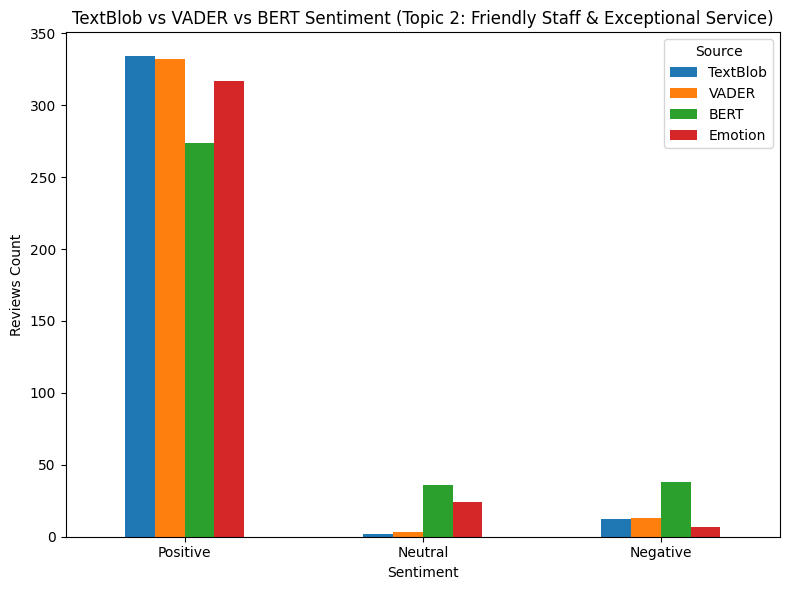

In [ ]:
# Get value counts for topic 2
TextBlob_topic02_counts = df_BERT_topic02['TextBlob_Analysis'].value_counts().reindex(["Positive", "Neutral", "Negative"], fill_value=0)
VADER_topic02_counts = df_BERT_topic02['VADER_Analysis'].value_counts().reindex(["Positive", "Neutral", "Negative"], fill_value=0)
BERT_topic02_counts = df_BERT_topic02['BERT_sentiment'].value_counts().reindex(["Positive", "Neutral", "Negative"], fill_value=0)
Emotion_topic02_counts = df_BERT_topic02['emotion_classify'].value_counts().reindex(["Positive", "Neutral", "Negative"], fill_value=0)

# Combine into a single DataFrame for comparison
combined_topic02_df = pd.DataFrame({
    'TextBlob': TextBlob_topic02_counts,
    'VADER': VADER_topic02_counts,
    'BERT': BERT_topic02_counts,
    'Emotion': Emotion_topic02_counts
}).fillna(0)  # fill NaNs with 0 for categories that are missing in one side

# Plot as a grouped bar chart
combined_topic02_df.plot(kind='bar', figsize=(8, 6))
plt.title("TextBlob vs VADER vs BERT Sentiment (Topic 2: Friendly Staff & Exceptional Service)")
plt.xlabel("Sentiment")
plt.ylabel("Reviews Count")
plt.xticks(rotation=0)
plt.legend(title="Source")
plt.tight_layout()
plt.show()

All methods classify most reviews as positive, with TextBlob and Emotion showing similars. BERT identifies fewer positive reviews but detects more neutral and negative ones, suggesting it picks up more nuanced or mixed sentiments. VADER shows moderate for neutral and negative sentiments. Overall, BERT appears more sensitive to diverse sentiment expressions in this topic, while TextBlob and Emotion lean towards more positive classifications.

### Calculate The Accuracy (Emotion vs TextBlob)

In [ ]:
# Compare Emotion vs TextBlob
accuracy_topic02 = accuracy_score(df_BERT_topic02['emotion_classify'], df_BERT_topic02['TextBlob_Analysis'])

print(f"Accuracy: {accuracy_topic02:.2f}")

print(classification_report(df_BERT_topic02['emotion_classify'], df_BERT_topic02['TextBlob_Analysis']))

Accuracy: 0.94
              precision    recall  f1-score   support

    Negative       0.58      1.00      0.74         7
     Neutral       1.00      0.08      0.15        24
    Positive       0.95      1.00      0.97       317

    accuracy                           0.94       348
   macro avg       0.84      0.69      0.62       348
weighted avg       0.95      0.94      0.91       348



The overall accuracy is 94%, showing strong agreement. Positive sentiment shows excellent precision (0.95) and recall (1.00), indicating most positive reviews are accurately classified. Negative sentiment has perfect recall but moderate precision, meaning some false positives exist. Neutral sentiment has perfect precision but very low recall, suggesting many neutral reviews are missed. Overall, the models perform well on positive and negative classes but struggle with identifying neutral sentiments in this topic.

### Calculate The Accuracy (Emotion vs VADER)

In [ ]:
# Compare Emotion vs VADER
accuracy_topic02 = accuracy_score(df_BERT_topic02['emotion_classify'], df_BERT_topic02['VADER_Analysis'])

print(f"Accuracy: {accuracy_topic02:.2f}")

print(classification_report(df_BERT_topic02['emotion_classify'], df_BERT_topic02['VADER_Analysis']))

Accuracy: 0.93
              precision    recall  f1-score   support

    Negative       0.46      0.86      0.60         7
     Neutral       1.00      0.12      0.22        24
    Positive       0.94      0.99      0.96       317

    accuracy                           0.93       348
   macro avg       0.80      0.66      0.60       348
weighted avg       0.94      0.93      0.91       348



The overall accuracy is high at 93%, showing strong agreement. Positive sentiment has excellent precision (0.94) and recall (0.99), indicating most positive reviews are correctly identified. Negative sentiment shows moderate precision (0.46) and good recall (0.86), while neutral sentiment has perfect precision but low recall (0.12), meaning many neutral reviews are missed. Overall, VADER performs well for positive and negative sentiments but struggles to capture neutral sentiment accurately in this topic.

### Calculate The Accuracy (Emotion vs BERT)

In [ ]:
# Compare Emotion vs BERT
accuracy_topic02 = accuracy_score(df_BERT_topic02['emotion_classify'], df_BERT_topic02['BERT_sentiment'])

print(f"Accuracy: {accuracy_topic02:.2f}")

print(classification_report(df_BERT_topic02['emotion_classify'], df_BERT_topic02['BERT_sentiment']))

Accuracy: 0.81
              precision    recall  f1-score   support

    Negative       0.18      1.00      0.31         7
     Neutral       0.17      0.25      0.20        24
    Positive       0.98      0.85      0.91       317

    accuracy                           0.81       348
   macro avg       0.44      0.70      0.47       348
weighted avg       0.91      0.81      0.85       348



The overall accuracy is 81%, showing moderate agreement. Positive sentiment has high precision (0.98) and good recall (0.85), indicating reliable detection of positive reviews. Negative sentiment shows very low precision (0.18) but perfect recall (1.00), suggesting many false positives despite capturing all negatives. Neutral sentiment has low precision (0.17) and recall (0.25), indicating difficulty in correctly identifying neutral cases. Overall, BERT performs well on positive sentiment but struggles with negative and neutral classifications in this topic.

### **Conclusion:**

To sum up, all three models had the same result in Positive sentiment for Topic 2: Friendly Staff & Exceptional Service. This indicate that the customer truly enjoy the friendliness and professional service of the hotel. TextBlob had best overall performance with highest accuracy, following by VADER and BERT. However, due to imbalance class, highest accuracy did not mean the best. But overall, for recall, precision in Negative and Positive and accuracy of TextBlob perform better than other.

## Topic 3: Parking & Service Concerns

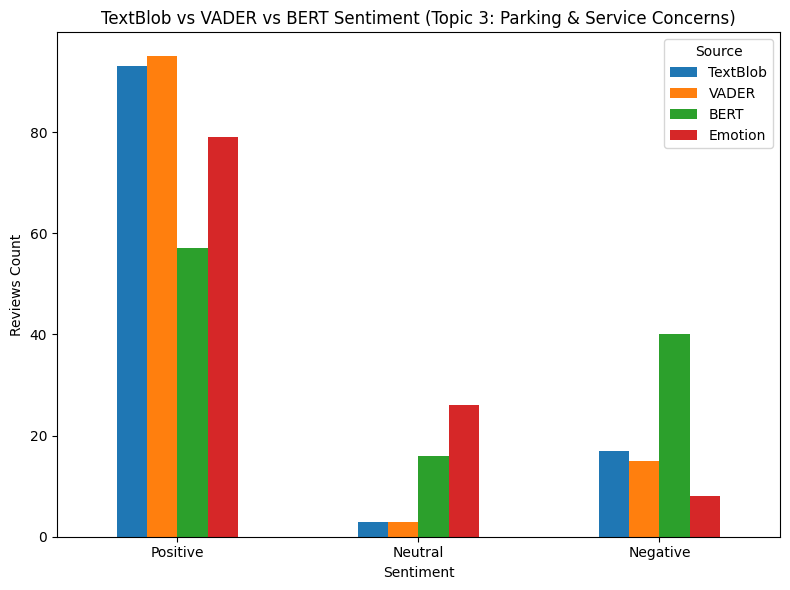

In [ ]:
# Get value counts for topic 3
TextBlob_topic03_counts = df_BERT_topic03['TextBlob_Analysis'].value_counts().reindex(["Positive", "Neutral", "Negative"], fill_value=0)
VADER_topic03_counts = df_BERT_topic03['VADER_Analysis'].value_counts().reindex(["Positive", "Neutral", "Negative"], fill_value=0)
BERT_topic03_counts = df_BERT_topic03['BERT_sentiment'].value_counts().reindex(["Positive", "Neutral", "Negative"], fill_value=0)
Emotion_topic03_counts = df_BERT_topic03['emotion_classify'].value_counts().reindex(["Positive", "Neutral", "Negative"], fill_value=0)

# Combine into a single DataFrame for comparison
combined_topic03_df = pd.DataFrame({
    'TextBlob': TextBlob_topic03_counts,
    'VADER': VADER_topic03_counts,
    'BERT': BERT_topic03_counts,
    'Emotion': Emotion_topic03_counts
}).fillna(0)  # fill NaNs with 0 for categories that are missing in one side

# Plot as a grouped bar chart
combined_topic03_df.plot(kind='bar', figsize=(8, 6))
plt.title("TextBlob vs VADER vs BERT Sentiment (Topic 3: Parking & Service Concerns)")
plt.xlabel("Sentiment")
plt.ylabel("Reviews Count")
plt.xticks(rotation=0)
plt.legend(title="Source")
plt.tight_layout()
plt.show()

All methods detect a majority of positive reviews, with VADER showing the highest positive count and BERT the lowest. BERT identifies substantially more neutral and negative reviews compared to others, suggesting higher sensitivity to mixed or negative sentiments in this topic. Emotion and TextBlob display similar positive and neutral counts but differ in negatives. Overall, BERT appears to capture a wider range of sentiment nuances, while the others tend to classify more reviews as positive.

### Calculate The Accuracy (Emotion vs TextBlob)

In [ ]:
# Compare Emotion vs TextBlob
accuracy_topic03 = accuracy_score(df_BERT_topic03['emotion_classify'], df_BERT_topic03['TextBlob_Analysis'])

print(f"Accuracy: {accuracy_topic03:.2f}")

print(classification_report(df_BERT_topic03['emotion_classify'], df_BERT_topic03['TextBlob_Analysis']))

Accuracy: 0.80
              precision    recall  f1-score   support

    Negative       0.47      1.00      0.64         8
     Neutral       1.00      0.12      0.21        26
    Positive       0.85      1.00      0.92        79

    accuracy                           0.80       113
   macro avg       0.77      0.71      0.59       113
weighted avg       0.86      0.80      0.74       113



The overall accuracy is 80%, indicating moderate agreement. Positive sentiment has strong recall (1.00) but slightly lower precision (0.85), meaning most positive reviews are correctly identified with some false positives. Negative sentiment shows perfect recall but moderate precision, suggesting some misclassifications. Neutral sentiment has perfect precision but very low recall (0.12), indicating many neutral cases are missed. Overall, the models perform well on positive and negative sentiments but have difficulty detecting neutral reviews in this topic.

### Calculate The Accuracy (Emotion vs VADER)

In [ ]:
# Compare Emotion vs VADER
accuracy_topic03 = accuracy_score(df_BERT_topic03['emotion_classify'], df_BERT_topic03['VADER_Analysis'])

print(f"Accuracy: {accuracy_topic03:.2f}")

print(classification_report(df_BERT_topic03['emotion_classify'], df_BERT_topic03['VADER_Analysis']))

Accuracy: 0.75
              precision    recall  f1-score   support

    Negative       0.47      0.88      0.61         8
     Neutral       0.67      0.08      0.14        26
    Positive       0.80      0.96      0.87        79

    accuracy                           0.75       113
   macro avg       0.64      0.64      0.54       113
weighted avg       0.75      0.75      0.69       113



The overall accuracy is 75%, indicating moderate agreement. Positive sentiment is well detected with good precision (0.80) and recall (0.96). Negative sentiment has moderate precision (0.47) and high recall (0.88), suggesting some false positives but most negatives are identified. Neutral sentiment shows low precision (0.67) and very low recall (0.08), indicating many neutral reviews are missed. Overall, VADER performs well on positive and negative sentiments but struggles to accurately classify neutral sentiment in this topic.

### Calculate The Accuracy (Emotion vs BERT)

In [ ]:
# Compare Emotion vs BERT
accuracy_topic03 = accuracy_score(df_BERT_topic03['emotion_classify'], df_BERT_topic03['BERT_sentiment'])

print(f"Accuracy: {accuracy_topic03:.2f}")

print(classification_report(df_BERT_topic03['emotion_classify'], df_BERT_topic03['BERT_sentiment']))

Accuracy: 0.58
              precision    recall  f1-score   support

    Negative       0.17      0.88      0.29         8
     Neutral       0.25      0.15      0.19        26
    Positive       0.95      0.68      0.79        79

    accuracy                           0.58       113
   macro avg       0.46      0.57      0.43       113
weighted avg       0.73      0.58      0.62       113



The overall accuracy is low at 58%, indicating limited agreement. While BERT performs well on positive sentiment with high precision (0.95), its recall is moderate (0.68), meaning some positives are missed. Negative sentiment has low precision (0.17) but good recall (0.88), suggesting many false positives but most negatives are captured. Neutral sentiment is challenging, with low precision and recall (0.25 and 0.15). Overall, BERT struggles to accurately classify negative and neutral sentiments in this topic, resulting in weaker performance.

### **Conclusion:**

In conclusion, all three models had the same result that Positive accounted for majority of dataset for Topic 3: Parking & Service Concerns. From all charts, it is clear although some guests express concerns about parking and added fees. While the majority is positive, parking and valet services are still get some neutral and negative, which indicate the space for further improvement. With two important indicators (accuracy and recall), TextBlob had better overall performance compared to VADER and BERT. Different from two previous topics, BERT is considered perform better than its in other topics due to its nature of this model.

## Topic 4: Scenic Views & Hotel Aesthetic

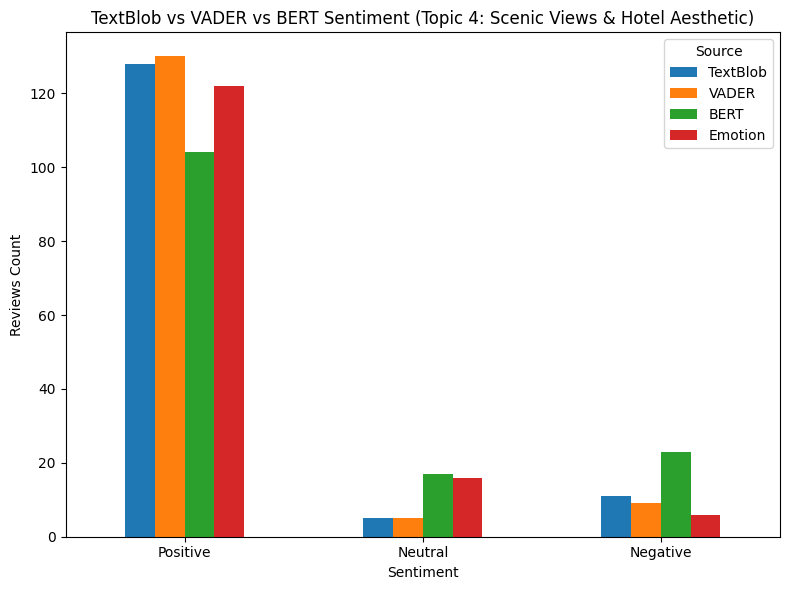

In [ ]:
# Get value counts for topic 4
TextBlob_topic04_counts = df_BERT_topic04['TextBlob_Analysis'].value_counts().reindex(["Positive", "Neutral", "Negative"], fill_value=0)
VADER_topic04_counts = df_BERT_topic04['VADER_Analysis'].value_counts().reindex(["Positive", "Neutral", "Negative"], fill_value=0)
BERT_topic04_counts = df_BERT_topic04['BERT_sentiment'].value_counts().reindex(["Positive", "Neutral", "Negative"], fill_value=0)
Emotion_topic04_counts = df_BERT_topic04['emotion_classify'].value_counts().reindex(["Positive", "Neutral", "Negative"], fill_value=0)

# Combine into a single DataFrame for comparison
combined_topic04_df = pd.DataFrame({
    'TextBlob': TextBlob_topic04_counts,
    'VADER': VADER_topic04_counts,
    'BERT': BERT_topic04_counts,
    'Emotion': Emotion_topic04_counts
}).fillna(0)  # fill NaNs with 0 for categories that are missing in one side

# Plot as a grouped bar chart
combined_topic04_df.plot(kind='bar', figsize=(8, 6))
plt.title("TextBlob vs VADER vs BERT Sentiment (Topic 4: Scenic Views & Hotel Aesthetic)")
plt.xlabel("Sentiment")
plt.ylabel("Reviews Count")
plt.xticks(rotation=0)
plt.legend(title="Source")
plt.tight_layout()
plt.show()

Most reviews are classified as positive by all methods, with VADER and TextBlob showing similar counts. BERT identifies fewer positive reviews but shows noticeably higher counts for neutral and negative sentiments, suggesting it detects more nuanced or mixed opinions. Emotion aligns closely with TextBlob and VADER on positive sentiment but differs on neutral and negative counts. Overall, BERT appears more sensitive to sentiment variations in this topic.

### Calculate The Accuracy (Emotion vs TextBlob)

In [ ]:
# Compare Emotion vs TextBlob
accuracy_topic04 = accuracy_score(df_BERT_topic04['emotion_classify'], df_BERT_topic04['TextBlob_Analysis'])

print(f"Accuracy: {accuracy_topic04:.2f}")

print(classification_report(df_BERT_topic04['emotion_classify'], df_BERT_topic04['TextBlob_Analysis']))

Accuracy: 0.92
              precision    recall  f1-score   support

    Negative       0.55      1.00      0.71         6
     Neutral       1.00      0.31      0.48        16
    Positive       0.95      1.00      0.98       122

    accuracy                           0.92       144
   macro avg       0.83      0.77      0.72       144
weighted avg       0.94      0.92      0.91       144



The overall accuracy is 92%, indicating strong agreement. Positive sentiment shows high precision (0.95) and perfect recall (1.00), reflecting accurate detection. Negative sentiment has perfect recall but moderate precision (0.55), indicating some false positives. Neutral sentiment has perfect precision but lower recall (0.31), meaning some neutral reviews are missed. Overall, the models perform well on positive and negative sentiments but find neutral sentiment more challenging to classify accurately in this topic.

### Calculate The Accuracy (Emotion vs VADER)

In [ ]:
# Compare Emotion vs VADER
accuracy_topic04 = accuracy_score(df_BERT_topic04['emotion_classify'], df_BERT_topic04['VADER_Analysis'])

print(f"Accuracy: {accuracy_topic04:.2f}")

print(classification_report(df_BERT_topic04['emotion_classify'], df_BERT_topic04['VADER_Analysis']))

Accuracy: 0.90
              precision    recall  f1-score   support

    Negative       0.56      0.83      0.67         6
     Neutral       0.80      0.25      0.38        16
    Positive       0.93      0.99      0.96       122

    accuracy                           0.90       144
   macro avg       0.76      0.69      0.67       144
weighted avg       0.90      0.90      0.88       144



The overall accuracy is 90%, indicating strong agreement. Positive sentiment is well classified with high precision (0.93) and recall (0.99). Negative sentiment shows moderate precision (0.56) and good recall (0.83), suggesting most negative reviews are detected despite some false positives. Neutral sentiment has lower precision (0.80) but low recall (0.25), indicating many neutral reviews are missed. Overall, VADER performs well for positive and negative sentiments but struggles to accurately identify neutral sentiment in this topic.

### Calculate The Accuracy (Emotion vs BERT)

In [ ]:
# Compare Emotion vs BERT
accuracy_topic04 = accuracy_score(df_BERT_topic04['emotion_classify'], df_BERT_topic04['BERT_sentiment'])

print(f"Accuracy: {accuracy_topic04:.2f}")

print(classification_report(df_BERT_topic04['emotion_classify'], df_BERT_topic04['BERT_sentiment']))

Accuracy: 0.73
              precision    recall  f1-score   support

    Negative       0.13      0.50      0.21         6
     Neutral       0.18      0.19      0.18        16
    Positive       0.95      0.81      0.88       122

    accuracy                           0.73       144
   macro avg       0.42      0.50      0.42       144
weighted avg       0.83      0.73      0.77       144



The overall accuracy is 73%, indicating moderate agreement. Positive sentiment is well detected with high precision (0.95) and good recall (0.81). Negative sentiment shows very low precision (0.13) and moderate recall (0.50), suggesting many false positives but capturing half of negative cases. Neutral sentiment has low precision (0.18) and recall (0.19), indicating difficulty in identifying neutral reviews. Overall, BERT performs well on positive sentiment but struggles with negative and neutral sentiments in this topic.

### **Conclusion**

In conclusion, all three models had the same result that Positive accounted for majority of dataset for Topic 4: Scenic Views & Hotel Aesthetic. From all charts, guests really enjoy the hotel’s beautiful look. Also, they like the blue colors and mermaid-themed decor, which make the hotel feel special and unique. Overall, TextBlob was the most balanced and reliable model for this topic. It has highest number in importance indicators. Compared to TextBlod, BERT and VADER performes well but has lower indicators.

## **5. Summary**

The sentiment analysis is conducted by using TextBlob, VADER, and BERT across four topics, from LDA. Across all four topics (Excellent Location & Nearby Attractions, Friendly Staff & Exceptional Service, Parking & Service Concerns, and Scenic Views & Hotel Aesthetic), positive sentiment was dominant, indicating high customer satisfaction. Although there are some minor dissatisfies in Parking & Service Concerns, it still had Positive sentiment, which shows that the hotel was doing good but need more improvement in this topic.
TextBlob consistently achieved the highest overall accuracy and was particularly effective at detecting clear Positive and Negative sentiments, though it struggled with Neutral classification in some topics.

# **V. Clustering**

The main objective of using clustering here is to identify common themes and recurring concerns of the topic

In [ ]:
#Read the file
df_clus = pd.read_csv("cleaned_merge_data_no_cleaned_advanced.csv")
df_clus.head()

,id,reviews,platform
0,1,great location. great service. rooms are nice....,google map
1,2,"wish they had a microwave and better wi-fi, bu...",google map
2,3,awesome location. room nice and big. nice brea...,google map
3,4,we absolutely loved our stay at the the argona...,google map
4,5,overall clean hotel and friendly staff. great ...,google map


In [ ]:
#PreProcessing - Vectorization to convert text to TF-IDF features
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = tfidf.fit_transform(df_clus['reviews'])

#Look for best k using elbow chart
number_clusters = range(1, 11)
kmeans = [KMeans(n_clusters=i, max_iter = 100, random_state=42) for i in number_clusters]

best k is: 5


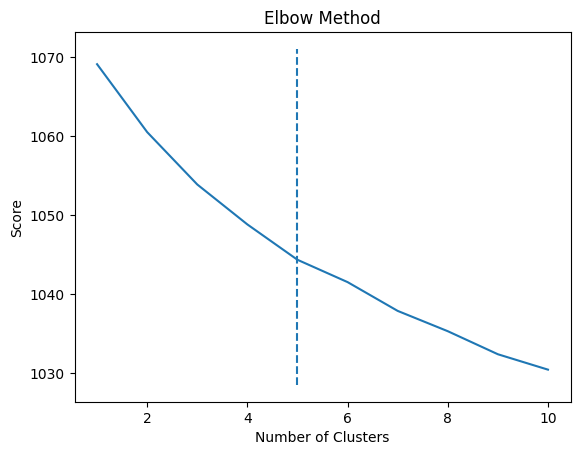

In [ ]:
# Plot the elbow chart
kmeans = [KMeans(n_clusters=i, n_init=10) for i in range(1, min(21, 10+1))]

# Suppress ConvergenceWarning
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning)

    # Compute the negative of the score for each KMeans model
    score = [-kmeans[i].fit(dtm).score(dtm) for i in range(len(kmeans))]

#Plotting
plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')


kn = KneeLocator(number_clusters, score, curve='convex', direction='decreasing')
k = kn.knee
print('best k is:', k)
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

From the above plotted chart, we have chosen 5 clusters to analyze that best fit for this dataset

In [ ]:
#Run k-means clustering

model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1, random_state=42)
model.fit(dtm)

df_clus['cluster'] = model.labels_
tfidf.get_feature_names_out()

#print top keywords
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

terms = tfidf.get_feature_names_out()

cluster_keyterms = []
for i in range(k):
  keyterms = []
  print("Cluster %d:" % i)
  for j in order_centroids[i, :10]:
      keyterm = ' %s' % terms[j]
      print (keyterm)
      keyterms.append([keyterm])
  cluster_keyterms.append([[i],keyterms])
  print('------------')
print (cluster_keyterms)

Cluster 0:
 great
 location
 hotel
 service
 nice
 excellent
 staff
 clean
 stay
 rooms
------------
Cluster 1:
 hotel
 san
 francisco
 argonaut
 stay
 wharf
 great
 fishermans
 rooms
 staff
------------
Cluster 2:
 hotel
 car
 cable
 walk
 location
 pier
 right
 wharf
 great
 street
------------
Cluster 3:
 room
 hotel
 nice
 view
 stay
 location
 great
 staff
 service
 like
------------
Cluster 4:
 staff
 wonderful
 friendly
 stay
 hotel
 location
 helpful
 beautiful
 argonaut
 love
------------
[[[0], [[' great'], [' location'], [' hotel'], [' service'], [' nice'], [' excellent'], [' staff'], [' clean'], [' stay'], [' rooms']]], [[1], [[' hotel'], [' san'], [' francisco'], [' argonaut'], [' stay'], [' wharf'], [' great'], [' fishermans'], [' rooms'], [' staff']]], [[2], [[' hotel'], [' car'], [' cable'], [' walk'], [' location'], [' pier'], [' right'], [' wharf'], [' great'], [' street']]], [[3], [[' room'], [' hotel'], [' nice'], [' view'], [' stay'], [' location'], [' great'], [' 

In [ ]:
# Add cluster labels to  original DataFrame
model = KMeans(n_clusters=k, random_state=42)
model.fit(dtm)
df_clus['cluster'] = model.labels_

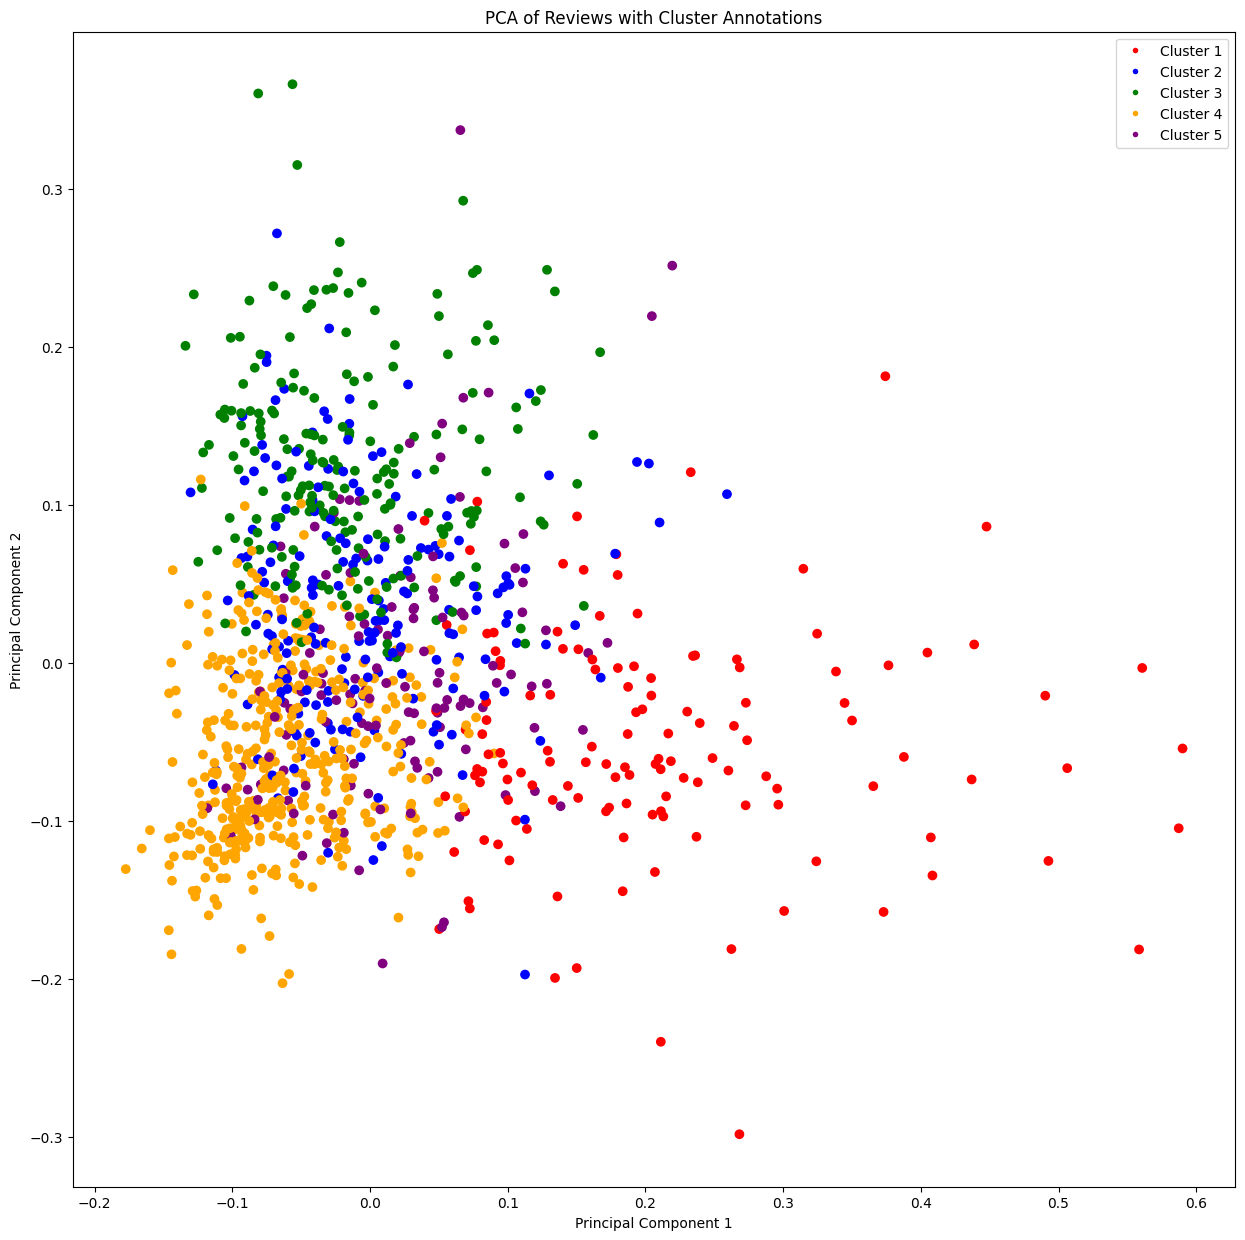

In [ ]:
# Interpret the result with PCA plot

# PCA Transformation:
pca = PCA(n_components=2)

scatter_plot_points = pca.fit_transform(dtm.toarray())

# Add more colors to match the number of clusters (k)
colors = ["red", "blue", "green", "orange", "purple", "yellow"]

# Extract Principal Components:
x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]

# Create Scatter Plot:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(x_axis, y_axis, c=[colors[d] for d in df_clus['cluster']])

# Re-add data_labels definition
data_labels = df_clus['reviews'].apply(lambda x: re.sub(r'[$\\]', '', str(x))).tolist() # Remove '$' and '\', convert to string and list

# Annotate each point - removed for readability due to large number of points
# for i, label in enumerate(data_labels):
#     ax.annotate(label, (x_axis[i], y_axis[i]), fontsize=9, alpha=0.75)

# Create Legend
# create a list of legend elemntes
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1),
               markerfacecolor=colors[i], markersize=5) for i in range(k)] # Use k to determine the number of legend elements
# Plot the legend
plt.legend(handles=legend_elements, loc='upper right')

plt.title('PCA of Reviews with Cluster Annotations')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

- Cluster 1 (red) is well-separated on the right side, suggesting a distinct theme with high internal variance.
- Cluster 2 (blue) overlaps with multiple groups, indicating mixed or general-purpose review content.
- Cluster 3 (green) is compact and coherent, reflecting a clear and focused topic.
- Cluster 4 (orange) is tightly clustered, likely representing consistent feedback with shared language.
- Cluster 5 (purple) is small and dispersed, possibly capturing unique or emotionally expressive reviews.

Overall, the clustering shows strong thematic grouping with some overlap, and spatial patterns align with topic diversity across the dataset.

<>:15: DeprecationWarning:

invalid escape sequence '\['

<>:15: DeprecationWarning:

invalid escape sequence '\['

/tmp/ipython-input-3754059789.py:15: DeprecationWarning:

invalid escape sequence '\['



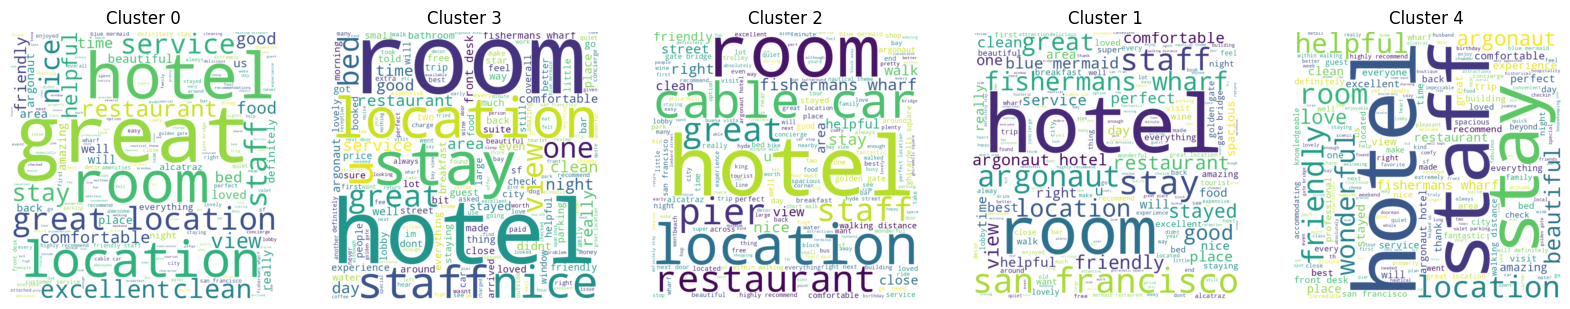

In [ ]:
# Word cloud for each cluster

def clean_column(data):
    if data is not None:
        stopwords_list = set(stopwords.words("english"))
        #exclusions = ['RE:', 'Re:', 're:']
        #exclusions = '|'.join(exclusions)
        data =  data.lower()
        data = re.sub('says', '', data)
        data = re.sub('said', '', data)
        data = re.sub('re:', '', data)
        data = re.sub('-', '', data)
        data = re.sub('_', '', data)
        # Remove data between square brackets
        data =re.sub('\[[^]]*\]', '', data)
        # removes punctuation
        data = re.sub(r'[^\w\s]','',data)
        data = re.sub(r'\n',' ',data)
        data = re.sub(r'[0-9]+','',data)
        # strip html
        p = re.compile(r'<.*?>')
        data = re.sub(r"\'ve", " have ", data)
        data = re.sub(r"can't", "cannot ", data)
        data = re.sub(r"n't", " not ", data)
        data = re.sub(r"I'm", "I am", data)
        data = re.sub(r" m ", " am ", data)
        data = re.sub(r"\'re", " are ", data)
        data = re.sub(r"\'d", " would ", data)
        data = re.sub(r"\'ll", " will ", data)
        data = p.sub('', data)
        data = data.strip()
        return data
df_clus['Review_New'] = df_clus['reviews'].apply(clean_column)

# Create a dictionary to hold the concatenated text for each cluster
cluster_texts = {i: "" for i in df_clus["cluster"].unique()}

# Concatenate the text of reviews for each cluster
for cluster in cluster_texts.keys():
    cluster_texts[cluster] = " ".join(df_clus[df_clus["cluster"] == cluster]["Review_New"])

# Generate and plot the word cloud for each cluster
fig, axs = plt.subplots(1, len(cluster_texts), figsize=(20, 10))

for idx, cluster in enumerate(cluster_texts.keys()):
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate(cluster_texts[cluster])

    axs[idx].imshow(wordcloud, interpolation='bilinear')
    axs[idx].set_title(f'Cluster {cluster}')
    axs[idx].axis('off')

plt.show()

The above word clouds show top keywords within each clusters, highlight outstanding features like:

*   CLuster 0: This cluster reflects overall positive reviews focusing on core aspects of the stay (room quality), hotel cleanliness, and a convenient location
*   Cluster 1: Likely highlight the property’s identity and famous places appeal near the hotel.
*   Cluster 2: Comment on convenience and access, including walkability and transportation options like cable cars
*   Cluster 3: Capture reviews that emphasize in-room comfort and service quality, likely highlighting guest satisfaction with the space and environment of the stay
*   Cluster 4: Mostly about emotional tone and staff interactions, with praise for helpfulness and friendliness









# **VI. Conclusion**

Out of the 3 text mining techniques, the most outstanding model is the Topic Modeling with LDA approach with 4 topics (Excellent Location & Nearby Attractions, Friendly Staff & Exceptional Service, Parking & Service Concerns and Scenic Views & Hotel Aesthetic). When going to sentiment analysis, although has some negative sentiment, all 3 model (TextBlob, VADER and BERT) has Positive as dominance. TextBlob perform better for accuracy, recall, precise, compared to other two model. The Clustering algorithm resulted in 5 suitable topics which also aligned and matched with topic modeling results.


